## Project Challenge: Predictive and exploratory analytics upon the household market of Santiago de Chile, based on geo-spatial data, zone and area characteristics

### **_by Sebastian Sbirna (s190553), Blanca Robledo Diaz (s174437) and Shalaka Patil (s191471)_**
---
## Table of Contents
- [Part 1: <u>Introduction</u>](#intro)
- [Part 2: <u>Data Preparation</u>](#dataprep)
- [Part 3: <u>Data Cleaning and Exploratory Data Analysis</u>](#datacl)
- [Part 4: <u>Insight Exploration</u>](#insights)
- [Part 5: <u>Data Augmentation</u>](#dataaug)
- [Part 6: <u>Review of modeling versions</u>](#review)
- [Part 7: <u>Defining the scoring methods</u>](#scoring)
- [Part 8: <u>Data Preparation for modeling</u>](#dataprep)
- [Part 9: <u>Classification using Logistic Regression</u>](#logreg)
- [Part 10: <u>Classification using Decision Trees (through Random Forest)</u>](#rndfst)
- [Part 11: <u>Classification using Neural Networks</u>](#nn)
- [Part 12: <u>Conclusion</u>](#ending)
---

<a id='intro'></a>
## Part 1: _<u>Introduction</u>_

Housing prices are an important reflection of the economy, and housing price ranges are of great interest for both buyers and sellers. In this project, our aim is to predict the type of household that will buy the house, given the area characteristics of the household and zone of the city. 

The area under study is Santiago de Chile. The provided dataset consists of data for ___18264 households explained by 30 variables i.e. area characteristics.___ We will use Machine Learning algorithms intended for Supervised Learning, in order to perform a classification of which household type would buy a house in some selected part of Santiago. The specific algorithms that we will use (Logistic Regression, Decision Trees, and Neural Network) will be presented in detail within a future part of this project.

Before being able to delve into the predictive analytics part, we first need to understand our dataset deeply, to manipulate it and eventually combine it with new attributes relevant to the topic. We will also need to clean the data, and, when we reach the ML modeling part, we will convert the data into usable matrices, which should be fed to the ML algorithms (_will be achieved in our final notebook_). 

---

<a id='dataprep'></a>
## Part 2: _<u>Data Preparation</u>_

In order to begin our analysis upon this dataset and understand what features it has, what they say about Santiago de Chile and its housing market, and utilize the dataset well for our Machine Learning task, we first need to prepare the data in a format that is clean, tidy and appropriate for our task. 

Let us begin by importing the necessary libraries that will be used throughout this Descriptive Analytics notebook, along with reading the Excel file where our household dataset resides.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches
import matplotlib.path as path
import seaborn as sns
import requests
import json
import utm
import math
import folium
import fiona
import branca

from IPython.display import display_html
from IPython.display import IFrame

pd.set_option('display.max_columns', 100)
# pd.options.display.float_format = '{:.4f}'.format

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_excel('Households Data.xlsx')

In [3]:
df.head()

,Hogar,EXCLUIR,paraValidacion,Sector,DirCoordX,DirCoordY,MontoArr,IngresoHogar,Factor,AnosEstudio,CLASE,Sup_Prom_Constr_Hab_EOD,Calid_EOD_norm_inv,DensConstr_EOD,Dist_est_Metro_MC_KM,Dist_salida_Autop_MC_KM,Tiempo_Com_Stgo,Ingreso_Promedio_Zona_MM,Acc_Comercio_tpte_pub,Acc_Educacion_tpte_pub,Acc_Habitacion_tpte_pub,Acc_Industria_tpte_pub,Acc_Servicios_tpte_pub,Acc_Comercio_auto,Acc_Educacion_auto,Acc_Habitacion_auto,Acc_Industria_auto,Acc_Servicios_auto,CLUSTER7,CLUSTER2
0,100010,0,0,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,0,0,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,0,0,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,0,0,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,0,0,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


As we can see above, since this dataset was collected by our supervisor's professional contact person in Chile, __Tomás Oettinger (_credits for the dataset_)__, all of its variables are presented to us in Spanish. Therefore, through asking questions regarding their purpose and translation, we are re-labeling the columns below to an English-speaking audience:

In [4]:
# Initially, we have written our English column names in the Dictionary sheet of the dataset, however that will not be available to everyone, 
# so we will just use the longer approach of saving the new names into a list
# ------------------------------------------------------------------------------------------------------------------------------------------

# metadata_df = pd.read_excel('Households Data.xlsx', sheet_name='Dictionary')

# column_names = metadata_df['English Names'].tolist()

# df.columns = column_names
# print(df.columns)

In [5]:
column_names = ['Household_ID', 'Excluded', 'Used_for_Validation', 'Sector', 'X', 'Y',
       'Monthly_Rent', 'Household_Income', 'Expansion_Factor',
       'Years_Education', 'Household_Type', 'Avg_Residential_Surface_Area',
       'Avg_Construction_Quality', 'Total_Building_Density_per_Zone',
       'KM_Nearest_Subway', 'KM_Nearest_Highway', 'CBD_Travel_Time',
       'Avg_Zonal_Income', 'Commerce_Accessibility_PT',
       'Education_Accessibility_PT', 'Household_Accessibility_PT',
       'Industry_Accessibility_PT', 'Services_Accessibility_PT',
       'Commerce_Accessibility_Car', 'Education_Accessibility_Car',
       'Household_Accessibility_Car', 'Industry_Accessibility_Car',
       'Services_Accessibility_Car', 'No_in_Cluster_7', 'No_in_Cluster_2']

In [6]:
df.columns = column_names

In [7]:
df.head()

,Household_ID,Excluded,Used_for_Validation,Sector,X,Y,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
0,100010,0,0,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,0,0,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,0,0,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,0,0,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,0,0,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


This looks much better, doesn't it? There are a few things to note regarding this dataset, among which we mention:

* The X and Y coordinates are actually UTM-encoded, which means that we will need to be careful, and eventually convert such coordinates into Lat-Lon measurements for easier manipulation
* This dataset has initially been used by Prof. Oettinger in another Machine Learning challenge, with a different problem formulation and variables needed. Even though we have our own task, we should expect that this dataset has been somewhat processed and cleaned. ___That does not mean that we should not take our time to check for any data errors or clean-up needed, since, while doing so, we also understand much more regarding the actual underlying patterns in our dataset.___

There will be more comments to be made upon each individual variable, and we will mention them as we progress in the development of our analysis here.

---

For now, let us __check the size of our dataset__, the types of variables inferred by the Pandas library, to understand the data better:

In [8]:
len(df)

18264

It appears that the dataset, before any cleaning, has **18264 entries** of housing locations in Santiago, capital of Chile.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18264 entries, 0 to 18263
Data columns (total 30 columns):
Household_ID                       18264 non-null int64
Excluded                           18264 non-null int64
Used_for_Validation                18264 non-null int64
Sector                             18264 non-null int64
X                                  18264 non-null float64
Y                                  18264 non-null float64
Monthly_Rent                       18264 non-null int64
Household_Income                   18264 non-null int64
Expansion_Factor                   18264 non-null float64
Years_Education                    18264 non-null int64
Household_Type                     18264 non-null int64
Avg_Residential_Surface_Area       18264 non-null float64
Avg_Construction_Quality           18264 non-null float64
Total_Building_Density_per_Zone    18264 non-null float64
KM_Nearest_Subway                  18264 non-null float64
KM_Nearest_Highway                 18

From the data above, we can see that we are working with a numeric dataset (with all variables being represented in a numeric format, including the categorical "target" variable __Household_Type__). This will greatly help our efforts in using sklearn's Machine Learning algorithm libraries to process this data. 

It would appear that this data has no null variables, however let us not be tricked by this apparent result. _For example, a value of 0.0 could probably be considered as null or missing value, in some of our variables._

For us to have a deep understanding of the dataset, we will delve into each individual variable and try to understand what its distribution and possible range of values is, eventually cleaning up some necessary errors.<br>

---

<a id='datacl'></a>
## Part 3: _<u>Data Cleaning and Exploratory Data Analysis</u>_

#### 1. Cleaning `Household_ID` column

Here, we want to check if each household in the dataset has its own unique ID, which should be the case, since each entry is referring to a different household in Santiago.

In [10]:
print('Total number of the household IDs is: ' + str(len(df.Household_ID)))
print('In order to check for uniquity of IDs, we will also what the total number of unique household IDs is: ' + str(len(df.Household_ID.unique())))

Total number of the household IDs is: 18264
In order to check for uniquity of IDs, we will also what the total number of unique household IDs is: 18264


It appears to be so. Then the only manipulation task that we will do here is to change the stored type of this ID from `int` to `string`, since IDs, even though they are numbers, we don't want to treat them as numbers and perform mathematical operations on them, but just let them uniquely represent a household.

In [11]:
df.Household_ID = df.Household_ID.astype(str)

#### 2. Cleaning `Excluded` column

We are not sure we understand exactly what the "Excluded" column was used for.

Perhaps in the other research upon this dataset, they have had some basis of exclusion for some of the data, however this should not catch us off-guard, since we have a different task, and they values which they exclude might very well be useful for us.

__Let us check the distribution of data within this variable:__

In [12]:
df.Excluded.value_counts()

0    16047
1     2217
Name: Excluded, dtype: int64

In [13]:
# This function will allow us to display two pandas DataFrames side-by-side
# Credits for this function: `ntg` from https://stackoverflow.com/questions/38783027/jupyter-notebook-display-two-pandas-tables-side-by-side
# ------------------------------------------------------------------------------------------------------------------------------------------

def display_side_by_side(*args):
    html_str = ''
    for df in args:
        html_str += df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'), raw = True)

In [14]:
print('Top:        EXCLUDED')
print('Bottom: NOT EXCLUDED')
print()

display_side_by_side(df[df.Excluded == True].describe(), df[df.Excluded == False].describe())

Top:        EXCLUDED
Bottom: NOT EXCLUDED



,Excluded,Used_for_Validation,Sector,X,Y,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
count,2217.0,2217.000000,2217.000000,2217.000000,2.217000e+03,2.217000e+03,2.217000e+03,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000,2217.000000
mean,1.0,0.804240,3.739738,345900.390988,6.293905e+06,2.332432e+05,7.466313e+05,111.349298,-7.348218,-15.819576,55.859585,0.561516,0.437314,4.611919,2.160017,57.745602,0.754170,2441.720144,1363.466849,22159.333864,1764.291737,2764.453758,5927.919278,3386.173347,58220.869635,4999.700591,6434.377952,3.929635,1.223275
std,0.0,0.396874,1.823784,10815.051190,1.089110e+04,2.021561e+05,9.125262e+05,77.896652,42.345308,38.326016,27.734841,0.394403,0.503943,7.815085,2.649806,22.746429,0.433408,1454.522176,743.924471,10868.341243,1025.892128,1884.921159,1701.120258,919.570340,15197.632979,1367.825626,2067.048151,1.651362,0.416535
min,1.0,0.000000,1.000000,284961.606500,6.260379e+06,1.000000e+04,0.000000e+00,6.647559,-99.000000,-99.000000,0.000000,0.000000,0.000000,0.014242,0.012117,-99.000000,0.190000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,1.000000,1.000000
25%,1.0,1.000000,2.000000,340315.370300,6.285961e+06,1.200000e+05,3.000000e+05,63.533680,8.000000,1.000000,40.500000,0.000000,0.177000,0.782329,0.848531,44.000000,0.496044,1319.826790,842.474850,14549.141630,1021.275030,1224.307900,5174.760000,3085.110000,53571.190000,4489.260000,5156.410000,2.000000,1.000000
50%,1.0,1.000000,3.000000,347379.491200,6.295613e+06,1.571480e+05,5.375100e+05,92.318352,12.000000,2.000000,48.000000,0.780000,0.265000,1.728231,1.489116,56.000000,0.604893,2227.727910,1331.173130,22429.415290,1636.806360,2292.516180,6237.370000,3560.370000,61617.260000,5226.190000,6608.260000,5.000000,1.000000
75%,1.0,1.000000,5.000000,352775.943700,6.301336e+06,2.700000e+05,8.793170e+05,133.294937,12.000000,2.000000,71.700000,0.930000,0.463000,4.203842,2.584112,70.000000,0.844261,3604.168590,1959.464130,31178.507150,2436.061710,4120.813760,7098.720000,3997.780000,68900.360000,5905.130000,7981.610000,5.000000,1.000000
max,1.0,1.000000,7.000000,380254.955500,6.327817e+06,2.000000e+06,1.480000e+07,654.615540,24.000000,3.000000,203.000000,1.000000,4.599000,59.055760,21.284732,202.000000,4.277630,6096.118100,3151.932340,44854.376160,4536.557030,7713.396150,8583.060000,4670.060000,75774.780000,7260.030000,10000.680000,7.000000,2.000000
,Excluded,Used_for_Validation,Sector,X,Y,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
count,16047.0,16047.0,16047.000000,16047.000000,1.604700e+04,1.604700e+04,1.604700e+04,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,16047.000000,

If we take a look at the above description of data between the __Excluded subset__ and the __Not Excluded subset__, we can clearly see that all of our variables seem to have ___very similar mean, standard deviation and quantile ranges for both categories___, with one exception: ___in some of the columns, the Except subset contains entries with `-99` as their values, most likely indicating a lack of response of a particular household to that survey question.___

Let us investigate further:

In [15]:
print('Total number of entries (rows) which come from EXCLUDED which contain missing data (i.e. -99 entries) is: ' + str(len(df[df.Excluded == True][df.isin([-99]).any(axis = 1) == True])))
print()
print('Total number of entries (rows) which come from NOT EXCLUDED which contain missing data (i.e. -99 entries) is: ' + str(len(df[df.Excluded == False][df.isin([-99]).any(axis = 1) == True])))

Total number of entries (rows) which come from EXCLUDED which contain missing data (i.e. -99 entries) is: 423

Total number of entries (rows) which come from NOT EXCLUDED which contain missing data (i.e. -99 entries) is: 0


---

Our finding appears to be indeed true, however let us please note that we have __2217__ excluded entries and only __423__ seem to have missing values of this form.

Instead of directly dropping all the _Excluded_ subset of data from our analysis, we will instead choose to only drop the entries with some values of `-99` to one of the questions, since we cannot easily predict what such data should have been in that field, and also since they are very few ___(2.31% of our dataset)___.

We are aware that we might find missing data further on, in other forms than represented just as `-99`, so we will not let our guard down.

Before we drop the above-mentioned entries, we have a strong hunch that the `Excluded` column might have something to do with the `used-for-validation` column. Therefore, let us also analyze this variable:

#### 3. Cleaning `Used_for_Validation` column

We assume that the data for which _Used_for_Validation_ is True have been used as validation set for the Machine Learning algorithms of the previous research upon the dataset. 

However, our project has a very clearly-defined training and test separation of data, which is diferent than the one Prof. Oettinger used before. 

Therefore, we are very inclined to drop this column, after receiving some insights about which data did he actually target.

In [16]:
len(df[df.Used_for_Validation == 1]) # How much of this data was used for validation?

1783

In [17]:
len(df[df.Excluded == True][df.Used_for_Validation == 1]) # How much of the Excluded data was used for validation?

1783

In [18]:
len(df[df.Excluded == False][df.Used_for_Validation == 1]) # How much of the Non-Excluded data was used for validation?

0

__It appears that all of the data used for validation actually comes from the _Excluded_ dataset__. 

This makes a lot of sense now, since we remember that we had __423 columns with missing entries__, and now we find __1783 columns used for model validation__, which, summed up, gives $423 + 1783 = 2206$. This is very close to our total number of __2217 excluded entries__, which means that, besides the 11 entries which have not yet been found why they were classified for being removed, we can now see that most of the `Excluded` variables actually shouldn't be excluded by us, since we are not using the same model validation subset as previously used.

In [19]:
print('Originally, the data used by Prof. Oettinger for model validation (Used_for_Validation) is %.2f%% of the original dataset.' % ((len(df[df.Excluded == True]) - len(df[df.Excluded == True][df.isin([-99]).any(axis = 1) == True])) / len(df) * 100))

Originally, the data used by Prof. Oettinger for model validation (Used_for_Validation) is 9.82% of the original dataset.


This data represents __~10% of our total dataset__, which can be saved by us from deletion after having performed this investigation.

In [20]:
df.drop(df[df.isin([-99]).any(axis = 1)].index, inplace = True)

___As mentioned before, we have dropped above the entries with missing values, after which we will also drop the columns `Excluded` and `Used_for_Validation`, since they are not necessary for our own project task.___

In [21]:
df.drop(columns = ['Excluded', 'Used_for_Validation'], inplace = True)

In [22]:
df.head()

,Household_ID,Sector,X,Y,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
0,100010,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


#### 4. Cleaning `Sector` column

The Sector variable is very important to our dataset, since it represents in which sector does a particular house lie geographically, and we would expect houses in the same sector to share some characteristics. 

Let us look at the distribution of houses in the sectors of Chile:

In [23]:
df.Sector.value_counts()

2    3716
6    3630
5    3296
1    2506
3    2430
7    1284
4     979
Name: Sector, dtype: int64

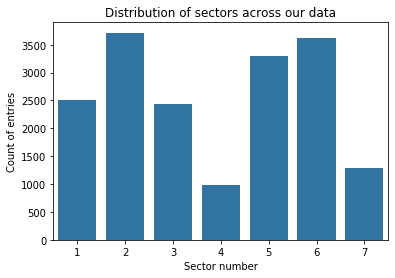

In [24]:
sns.barplot(df.Sector.value_counts().index, df.Sector.value_counts().values, color = sns.color_palette()[0]);
plt.xlabel('Sector number');
plt.ylabel('Count of entries');
plt.title('Distribution of sectors across our data');

As we can see above, there are apparently 7 sectors of Chile, and the distribution shows that we have less data for sector 4 and 7 than for the other sectors.

__In any case, since we will later on use Machine Learning to predict decisions upon the household market, we would need our training data to contain at least some households from each of the 7 sectors, and more importantly, the test data would need to be distributed with entries across these 7 sectors as well.__

#### 5. Cleaning `X and Y` coordinate columns

In [25]:
df.head()

,Household_ID,Sector,X,Y,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
0,100010,7,335180.8019,6266420.975,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,7,338410.2114,6265607.141,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,7,327863.8248,6257800.086,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,7,327864.0000,6257800.000,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,7,338480.8152,6267296.941,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


As mentioned before, __X and Y are initially given in a UTM coordinate format.__ Since we would further like to do some plotting and mapping of our data, it will be much easier to work with universal Latitude-Longitude coordinates instead, since UTM coordinates not unique, they are dependent on a zone number and on northern/southern hemisphere.

After a thorough search, we have identified that Chile lies at the edge of UTM zone 19 (in the southern hemisphere), therefore we will use the UTM library in order to transform the coordinates to what was desired:

In [26]:
def create_lat_lon_from_UTM_coordinates(X, Y):
    return pd.Series(utm.to_latlon(X, Y, zone_number = 19, northern = False), index = ['Lat', 'Lon'])

In [27]:
# For each individual DataFrame entry, use the above function to convert the UTM coordinates to Lat-Lon coordinates
df[['Lat', 'Lon']] = df.apply(lambda row: create_lat_lon_from_UTM_coordinates(row.X, row.Y), axis = 1)

In [28]:
# Since the new Lat and Lon columns appear at the end of the Dataframe, we will move them back to their original position by shifting the positions of columns
df = pd.concat([df[df.columns[0:4]], df[df.columns[-2:]], df[df.columns[4:-2]]], axis = 1)

In [29]:
df.head()

,Household_ID,Sector,X,Y,Lat,Lon,Monthly_Rent,Household_Income,Expansion_Factor,Years_Education,Household_Type,Avg_Residential_Surface_Area,Avg_Construction_Quality,Total_Building_Density_per_Zone,KM_Nearest_Subway,KM_Nearest_Highway,CBD_Travel_Time,Avg_Zonal_Income,Commerce_Accessibility_PT,Education_Accessibility_PT,Household_Accessibility_PT,Industry_Accessibility_PT,Services_Accessibility_PT,Commerce_Accessibility_Car,Education_Accessibility_Car,Household_Accessibility_Car,Industry_Accessibility_Car,Services_Accessibility_Car,No_in_Cluster_7,No_in_Cluster_2
0,100010,7,335180.8019,6266420.975,-33.729444,-70.779035,100000,450845,136.393738,11,1,53.8,0.98,0.059,23.051711,4.345179,69,0.519765,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
1,100020,7,338410.2114,6265607.141,-33.737278,-70.744340,120000,1019369,73.843597,11,1,59.6,0.98,0.033,21.080177,1.381521,84,0.678317,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
2,100030,7,327863.8248,6257800.086,-33.805994,-70.859656,70000,80000,180.722809,10,1,59.5,0.98,0.004,34.147894,11.993389,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
3,100041,7,327864.0000,6257800.000,-33.805995,-70.859654,80000,559259,150.379059,14,2,59.5,0.98,0.004,34.147817,11.993268,83,0.408158,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1
4,100052,7,338480.8152,6267296.941,-33.722055,-70.743270,117771,710309,122.001518,12,2,43.6,0.98,0.086,19.908792,1.363177,94,0.498140,704.97642,406.0983,6110.62492,671.08681,719.84272,3036.41,1781.81,30505.65,2853.19,3058.03,3,1


This looks like a nice result. Now that our conversion is performed correctly, we no longer have the need for the `X` and `Y` columns, which tell us the same thing as the `Lat` and `Lon` columns. 

Therefore, we will drop these two columns:

In [30]:
df.drop(columns = ['X', 'Y'], inplace = True)

#### 6. Cleaning `Monthly_Rent` column

From now, most of the variables in our dataset will represent attributes about the household or the area in which the house is located. Therefore, we need to pay extra attention for missing values, errors and for the data distribution.

Let us check whether there is anyone who did not answer what their monthly rent is:

In [31]:
len(df[df.Monthly_Rent == 0.0])

0

Fortunately, it seems that such isn't the case. 

In order to take a look at the distribution of our variable, let us understand what values did the surveyed people most often respond within this column. We will have a look at the 10 most common and least common answers within our data:

In [32]:
print(df.Monthly_Rent.value_counts().iloc[0:10])

100000    1762
120000    1706
150000    1678
200000    1045
80000      835
130000     671
180000     638
140000     576
250000     550
70000      428
Name: Monthly_Rent, dtype: int64


In [33]:
print(df.Monthly_Rent.value_counts().iloc[-10:])

175343    1
130277    1
173278    1
122065    1
478403    1
142527    1
138425    1
126135    1
386230    1
169987    1
Name: Monthly_Rent, dtype: int64


From these results, we can infer the following idea: ___The most common answers people gave regarding their monthly rent were of approximate, rounded values.___ 

Fewer people indeed gave us more exact numbers, and, if you consider that a Machine Learning model needs to perform classification based on these answers, then we would want some level of uniformity of the distribution. 

Therefore, binning the small number unique responses into the larger "categories" of monthly rent will likely increase the smoothness of the distribution, and thus allow for better usage of this variable in prediction.

__This is how `Monthly_Rent` looks like before binning:__

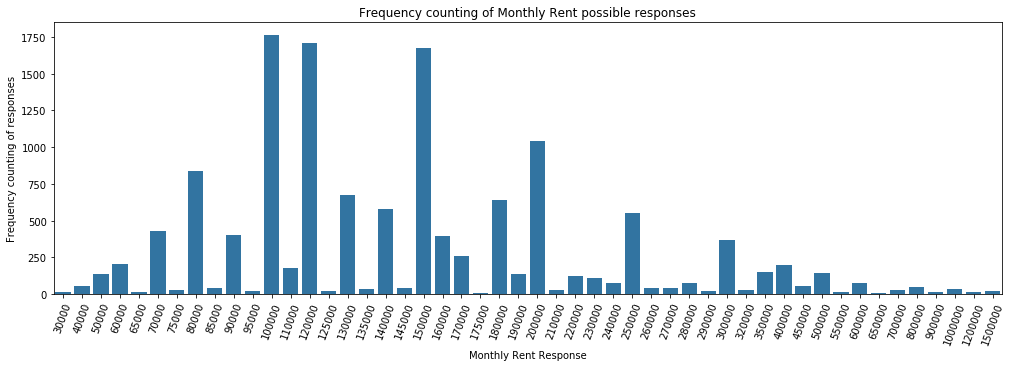

In [34]:
plt.figure(figsize = [17, 5]);
sns.barplot(x = df.Monthly_Rent.value_counts().iloc[0:50].index, y = df.Monthly_Rent.value_counts().iloc[0:50].values, color = sns.color_palette()[0]);
plt.xticks(rotation = 70);
plt.xlabel('Monthly Rent Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of Monthly Rent possible responses');

By creating a round-up function based on the respondents' pattern, we are better able to represent the data in a format which ___bins the value of rent in units of 10000 pesos.___

In [35]:
def roundup(x):
    if (x < pow(10,6)):
        if (x % 10000 >= 5000):
            return int(math.ceil(x / 10000.0)) * 10000 
        else:
            return int(math.floor(x / 10000.0)) * 10000
    else:
        if (x % 100000 >= 50000):
            return int(math.ceil(x / 100000.0)) * 100000
        else:
            return int(math.floor(x / 100000.0)) * 100000

In [36]:
df.Monthly_Rent = df.Monthly_Rent.apply(lambda value: roundup(value))

__This is how `Monthly_Rent` looks like after binning:__

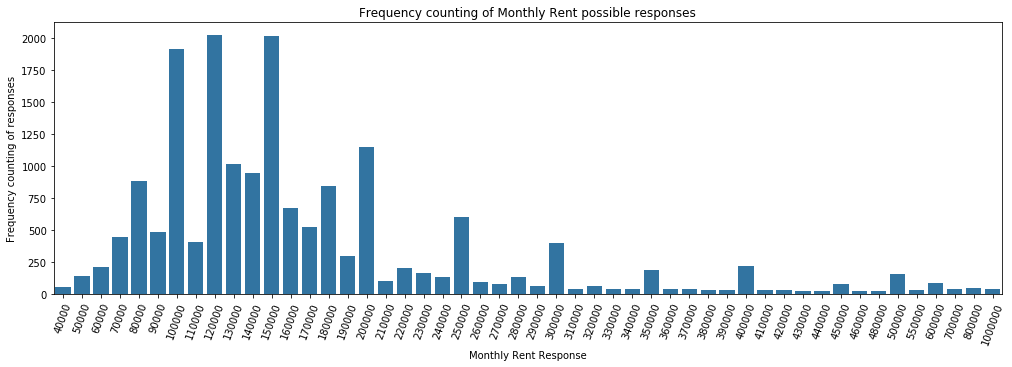

In [37]:
plt.figure(figsize = [17, 5]);
sns.barplot(x = df.Monthly_Rent.value_counts().iloc[0:50].index, y = df.Monthly_Rent.value_counts().iloc[0:50].values, color = sns.color_palette()[0]);
plt.xticks(rotation = 70);
plt.xlabel('Monthly Rent Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of Monthly Rent possible responses');

#### 7. Cleaning `Household_Income` column

For the next variables, we will use the same analysis pattern as for the `Monthly_Rent`, in order to make the analysis easier to follow:

Let us check the number of missing values:

In [38]:
len(df[df.Household_Income == 0.0])

3

__3 values are missing from this column.__ We have two choices now: either we throw away the data entry, or we replace the missing values with an appropriate measurement. Either of these seem reasonable, and, since we do not have too much data to begin with, we have decided to replace the missing values. 

___Since household income is a variable with a right-skewed distribution (meaning that there are more values of low income than high income, however the high income values can be quite large), we will get more representative results if we use the `MEDIAN` of the values than the `MEAN`, for replacing the missing entries.___

In [39]:
df.loc[(df.Household_Income == 0.0), 'Household_Income'] = round(df.Household_Income.median())

Let us take a look at the distribution of the values, as before:

In [40]:
print(df.Household_Income.value_counts().iloc[0:10])

300000    296
200000    226
400000    223
500000    213
250000    182
600000    173
350000    168
450000    139
700000    127
550000    104
Name: Household_Income, dtype: int64


In [41]:
print(df.Household_Income.value_counts().iloc[-10:])

1464948    1
896079     1
3089486    1
1129549    1
629833     1
1238086    1
808000     1
227990     1
435262     1
655360     1
Name: Household_Income, dtype: int64


It seems that we again have to deal with lots of answers represented with a multiple of 100000, yet few who also responded with exact values of their household rent. Since we anyway have constructed our previous function to deal with this issue, let us once again bin the household income values appropriately:

__This is how `Household_Income` looks like before binning:__

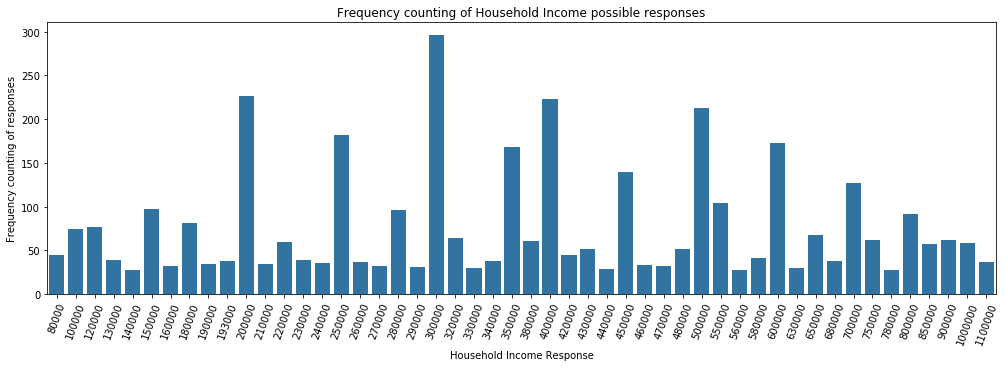

In [42]:
plt.figure(figsize = [17, 5]);
sns.barplot(x = df.Household_Income.value_counts().iloc[0:50].index, y = df.Household_Income.value_counts().iloc[0:50].values, color = sns.color_palette()[0]);
plt.xticks(rotation = 70);
plt.xlabel('Household Income Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of Household Income possible responses');

In [43]:
df.Household_Income = df.Household_Income.apply(lambda value: roundup(value))

In [44]:
# After rounding, some low values might have rounded to 0.0, so we will take care of that here:
df.loc[(df.Household_Income == 0.0), 'Household_Income'] = round(df.Household_Income.median())

__This is how `Household_Income` looks like after binning:__

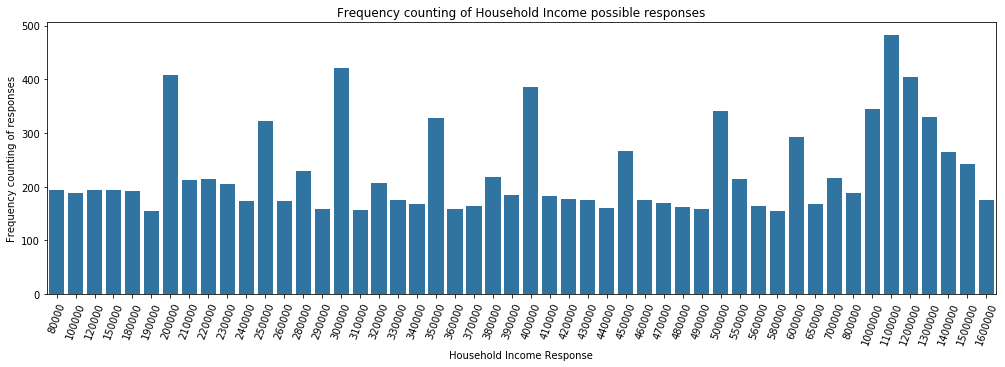

In [45]:
plt.figure(figsize = [17, 5]);
sns.barplot(x = df.Household_Income.value_counts().iloc[0:50].index, y = df.Household_Income.value_counts().iloc[0:50].values, color = sns.color_palette()[0]);
plt.xticks(rotation = 70);
plt.xlabel('Household Income Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of Household Income possible responses');

#### 8. Cleaning `Expansion_Factor` column

Let us check for any missing values:

In [46]:
len(df[df.Expansion_Factor == 0.0])

0

No missing values, great! And what are the most and least common expansion factors that we should expect here?

In [47]:
df.Expansion_Factor.value_counts().iloc[0:10]

91.342308     60
22.431303     53
58.807510     47
69.352577     44
124.340179    35
47.911781     33
70.047203     32
73.528168     28
95.274529     25
39.335964     25
Name: Expansion_Factor, dtype: int64

In [48]:
df.Expansion_Factor.value_counts().iloc[-10:]

121.618034    1
22.126963     1
95.900642     1
591.880005    1
224.270432    1
114.642769    1
185.485641    1
88.264801     1
49.926498     1
70.303154     1
Name: Expansion_Factor, dtype: int64

Unfortunately, the above distribution doesn't really tell us much, so __let's turn to a histogram for checking the distribtion of expansion factors__. We have selected, after multiple graphs, a separation with _70 bins_:

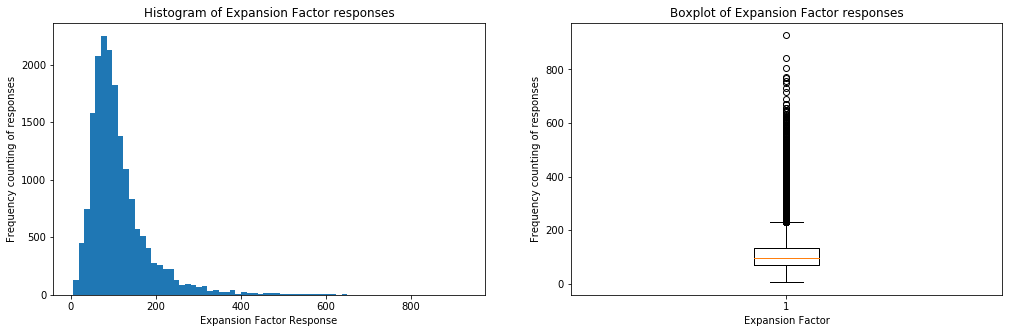

In [49]:
plt.figure(figsize = [17, 5])

plt.subplot(1, 2, 1)
plt.hist(df.Expansion_Factor, bins = 70);
plt.xlabel('Expansion Factor Response');
plt.ylabel('Frequency counting of responses');
plt.title('Histogram of Expansion Factor responses');

plt.subplot(1, 2, 2)
plt.boxplot(df.Expansion_Factor);
plt.xlabel('Expansion Factor');
plt.ylabel('Frequency counting of responses');
plt.title('Boxplot of Expansion Factor responses');

This histogram shows us that the Expansion Factor is having a ___clearly right skewed distribution___, and the boxplot compliments this assessment by showing us that the range of values between ~0 and 200 can be considered as common, and after that we have a lange number of outliers with factor values between ~200 to ~900. 

Since we do not have a clear idea regarding how exactly these factors have been measured and whether or not these outlier values are normal, we will leave this column without further manipulation, however now we are aware of the data representation of this column.

#### 9. Cleaning `Years_Education` column

As before, let us check and see whether there are missing values in this column. 

Here, we argue that even though it would be allowed to have households with __0 number of years of education__, having researched into the educational system of Chile, **OECD** (reference [here](https://www.oecd-ilibrary.org/docserver/9789264285637-5-en.pdf)) mentions that Chile has a number of 12 compulsory years of education, and even after the 1930s, 6 years of school were mandatory and state-subsidized.

Therefore, while we can expect some households to have less than 12 years of education due to their age and the previous social situation of the country, we would never expect a household to have _0 years of education_. Therefore, such values will be treated as ___missing values___.

In [50]:
len(df[df.Years_Education == 0.0])

258

It appears that we have a number of ___258___ missing values here, which is not too encouraging. Again, we have a choice to remove them or replace them with the median for this variable (which is 12 years of schooling). ___Since this variable is related to the household itself, and not to the housing, we will anyway not include this variable in our Machine Learning model, in order not to allow predictions regarding households based on properties of the household (which obviously have strong correlation). Therefore, we will replace the missing values with the median of the `Years_Education` column.___

In [51]:
df.loc[(df.Years_Education == 0.0), 'Years_Education'] = round(df.Years_Education.median())

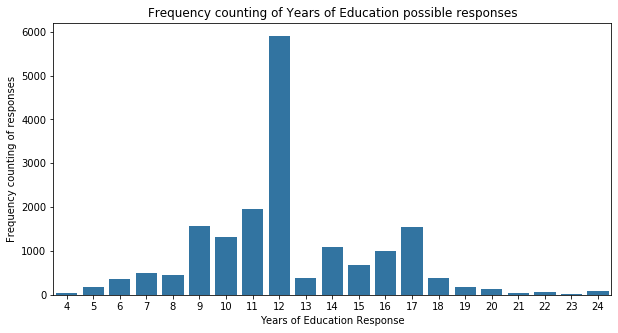

In [52]:
plt.figure(figsize = [10, 5])
sns.barplot(df.Years_Education.value_counts().index, df.Years_Education.value_counts().values, color = sns.color_palette()[0]);
plt.xlabel('Years of Education Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of Years of Education possible responses');

By checking the barplot above regarding the distribution of household education years in our data, we can see that the _vast majority of the surveyed population has the minimum of 12 years of schooling, with some people (presumably older ones) have 9+ schooling years and some (presumably the subset of people who pursued degree studies) have 14+ school years._

#### 10. Cleaning `Household_Type` column (_our model target variable_)

We need to be extra careful with the representation of this attribute, since it will become the target variable for our classification ML algorithms.

Let us check for any missing values and for the percentage distribution of each __class__ within our data.

In [53]:
len(df[df.Household_Type == 0.0])

0

In [54]:
df.Household_Type.value_counts()

2    7777
1    6627
3    3437
Name: Household_Type, dtype: int64

In [55]:
print('The percentage of household type 1 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 1]) * 100 / len(df)))
print('The percentage of household type 2 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 2]) * 100 / len(df)))
print('The percentage of household type 3 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 3]) * 100 / len(df)))

The percentage of household type 1 responses in the dataset is: 37.14% of the total number of entries.
The percentage of household type 2 responses in the dataset is: 43.59% of the total number of entries.
The percentage of household type 3 responses in the dataset is: 19.26% of the total number of entries.


As we can see above, there are no missing values, and the classes in our data are represented in proportions approximative to __35%-45%-20%__, which are good distributions, since all the proportions are decently large enough to expect some variation in our data.

Taking a wild guess as to what these types might mean, based on their distribution across the population, we might have type 1, which are the poor families, type 2 being the average household with normal living standard, and type 3 being the wealthy households. This assumption is based on the social class distribution across the entire country of Chile, however it is a wild guess, and we will not base our analysis on it until we may have supporting evidence (if necessary).

#### 11. Cleaning `Avg_Residential_Surface_Area` column 

Let us check for missing values within the residential surface area variable.

___As we might expect, a value of 0 sq-meters probably refers to a missing value:___

In [56]:
len(df[df.Avg_Residential_Surface_Area == 0.0])

971

This is actually a high number of entries where the value is missing (~5% of the dataset). This is definitely not a good result, and we can't expect to throw ~5% of the dataset right away because of this. Instead, let us look at which values are most common, checked the skewedness of the distribution, and decide whether we should replace the missing values with either ___the mean___ or ___the median___.

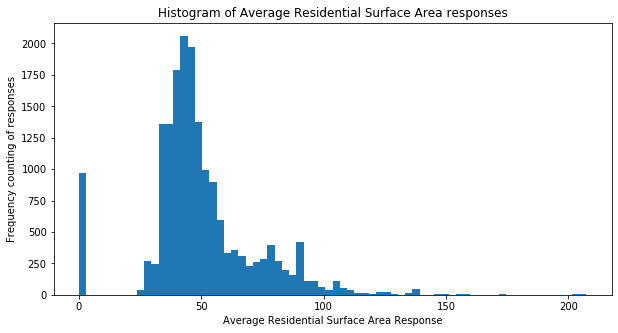

In [57]:
plt.figure(figsize = [10, 5])
plt.hist(df.Avg_Residential_Surface_Area, bins = 70);
plt.xlabel('Average Residential Surface Area Response');
plt.ylabel('Frequency counting of responses');
plt.title('Histogram of Average Residential Surface Area responses');

In [58]:
df.Avg_Residential_Surface_Area.value_counts().iloc[0:10]

0.0     971
42.6    364
46.4    207
42.5    200
44.9    190
40.5    189
43.6    185
51.7    183
35.5    177
89.6    176
Name: Avg_Residential_Surface_Area, dtype: int64

In [59]:
df.Avg_Residential_Surface_Area.value_counts().iloc[-10:]

107.1    1
104.1    1
68.4     1
83.9     1
86.0     1
167.3    1
183.1    1
130.0    1
138.5    1
69.8     1
Name: Avg_Residential_Surface_Area, dtype: int64

As we can see from the histogram above, this attribute has a right-skewed distribution, which tells us that __the median__ of the values is a better candidate for using in filling in the 0 sq-meters entries, as the mean is affected by the many large outliers within the data (_i.e. the tail_) and will give us a higher (erroneous) average area than the median does.

In [60]:
df.loc[(df.Avg_Residential_Surface_Area == 0.0), 'Avg_Residential_Surface_Area'] = df.Avg_Residential_Surface_Area.median()

#### 12. Cleaning `Avg_Construction_Quality` column 

Once again, let us see the distribution of the average construction quality measurement:

In [61]:
df.Avg_Construction_Quality.value_counts()

0.78    3716
0.36    3630
1.00    3296
0.93    2506
0.00    2430
0.98    1284
0.55     979
Name: Avg_Construction_Quality, dtype: int64

This time, we are met with very few value choices within the attribute (which we are not exactly sure how they were counted).

___What is slightly strange and worrying is that there are 2753 values of 0 in construction quality___. We are not sure whether this means that the value is missing, erroneous, or simply calculated correctly as such (_but, still, if the quality would be 0, would the house even be standing?_).

We are slightly concerned on the measurements of this variable, so we will leave it alone for now, however we must mention that we will be checking thoroughly for its predictive power when doing machine learning, and eventually removing it if not contributing to the model.

#### 13. Cleaning `Total_Building_Density_per_Zone` column 

Once again, let us check for any missing values:

In [62]:
len(df[df.Total_Building_Density_per_Zone == 0.0])

978

We again have a large number of missing values for this attribute, since it is not possible that the density of other building in the whole zone area to be 0.

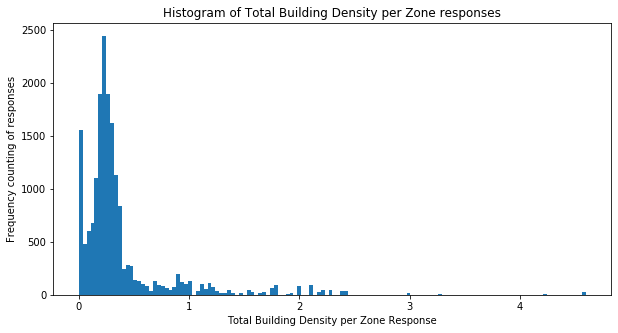

In [63]:
plt.figure(figsize = [10, 5])
plt.hist(df.Total_Building_Density_per_Zone, bins = 130);
plt.xlabel('Total Building Density per Zone Response');
plt.ylabel('Frequency counting of responses');
plt.title('Histogram of Total Building Density per Zone responses');

In [64]:
df.Total_Building_Density_per_Zone.value_counts().iloc[0:10]

0.000    978
0.247    412
0.160    283
0.272    276
0.237    248
0.220    227
0.005    207
0.375    194
0.106    174
0.264    171
Name: Total_Building_Density_per_Zone, dtype: int64

In [65]:
df.Total_Building_Density_per_Zone.value_counts().iloc[-10:]

0.046    3
0.110    2
0.433    2
0.350    2
0.176    2
0.023    1
0.066    1
0.323    1
1.013    1
0.067    1
Name: Total_Building_Density_per_Zone, dtype: int64

The histogram and the frequency counting above also show us that there is an outstanding number of missing values in what appears to be a right-skewed distribution of building densities. Therefore, as explained previously, we will use the median of this distribution to account for the missing values:

In [66]:
df.loc[(df.Total_Building_Density_per_Zone == 0.0), 'Total_Building_Density_per_Zone'] = df.Total_Building_Density_per_Zone.median()

#### 14. Cleaning `KM_Nearest_Subway` column 

In [67]:
len(df[df.KM_Nearest_Subway == 0.0])

0

Finally, we have a column which does not appear to have missing values. What range of values are most and least expected from this attribute?

In [68]:
df.KM_Nearest_Subway.value_counts()

7.431081     12
10.644616    10
9.106313      9
4.947447      9
9.106222      9
             ..
7.675433      1
8.061919      1
0.833694      1
3.009846      1
0.542744      1
Name: KM_Nearest_Subway, Length: 16620, dtype: int64

As we can see, almost each individual household has a different exact number of KM to the nearest subway (_which makes sense, since this value is calculated with 6 decimals, making it very improbable that two households would be exactly equally distant to a subway_).

No further cleanup seems to be required.

#### 15. Cleaning `KM_Nearest_Highway` column 

In [69]:
len(df[df.KM_Nearest_Highway == 0.0])

0

In [70]:
df.KM_Nearest_Highway.value_counts()

5.440625    12
8.974123    10
5.694528     9
7.301569     9
7.301575     9
            ..
1.031884     1
4.715210     1
1.877751     1
3.213027     1
4.802511     1
Name: KM_Nearest_Highway, Length: 16620, dtype: int64

Very similar to our previous attribute, we also have no missing attributes, and disparity between almost every entry measurement exists. 

No further cleanup seems to be required.

#### 15. Cleaning `CBD_Travel_Time` column 

In [71]:
len(df[df.CBD_Travel_Time == 0.0])

0

Fortunately, it seems that we don't have any missing values here either.

In [72]:
df.CBD_Travel_Time.value_counts()

68     647
60     594
59     579
67     480
53     453
      ... 
125     10
105     10
13       9
133      2
2        1
Name: CBD_Travel_Time, Length: 97, dtype: int64

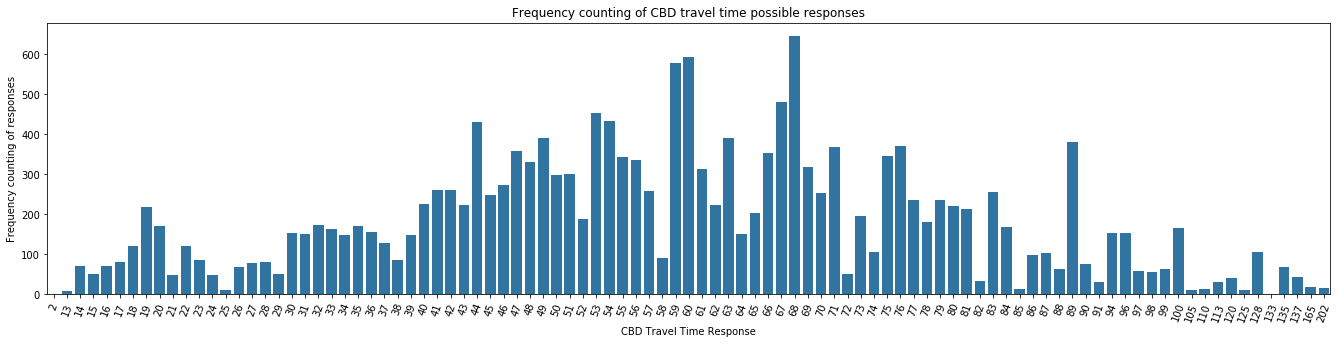

In [73]:
plt.figure(figsize = [23, 5]);
sns.barplot(x = df.CBD_Travel_Time.value_counts().index, y = df.CBD_Travel_Time.value_counts().values, color = sns.color_palette()[0]);
plt.xticks(rotation = 70);
plt.xlabel('CBD Travel Time Response');
plt.ylabel('Frequency counting of responses');
plt.title('Frequency counting of CBD travel time possible responses');

From the frequency histogram presented above, the distribution of travel time (in minutes) to the CBD (Central Business District) from any individual house seems to be well-represented, with ___most values residing between 40 and 80 minutes___ (which makes sense, since most people live somewhere in the suburbs of the city, and there is less housing in the CBD than there is outside it). 

We would consider making a more smooth binning function for the travel time presented here, however as we can see that, between consecutive units of time of 1 min distance (_e.g. between 33 min and 34 min_), the number of households reporting it seems to be almost the same, we would argue that these values might reflect a real-life data pattern that should be understood by the ML algorithm.

#### 16. Cleaning `Avg_Zonal_Income` column 

In [74]:
len(df[df.Avg_Zonal_Income == 0.0])

0

Once again, this attribute seems to be free from missing values.

In [75]:
df.Avg_Zonal_Income.value_counts()

0.421979    274
0.598732    177
0.691664    176
0.730312    169
0.673949    161
           ... 
0.385331      1
0.605629      1
0.373542      1
0.560000      1
0.498111      1
Name: Avg_Zonal_Income, Length: 786, dtype: int64

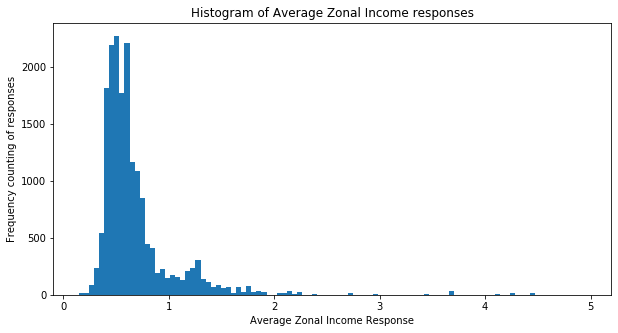

In [76]:
plt.figure(figsize = [10, 5])
plt.hist(df.Avg_Zonal_Income, bins = 100);
plt.xlabel('Average Zonal Income Response');
plt.ylabel('Frequency counting of responses');
plt.title('Histogram of Average Zonal Income responses');

From the distribution of the average zonal income within which a household is located, we can see that most of these values are between 0 and ~1.2, with very few scattered exceptional values which surpass ratios of 2.

___Normally, we always would need to check whether such outliers are really representative or erroneous,___ but since we do not know how this value was calculated (_and honestly speaking, we also are not sure why it's represented as a ratio_), we have decided to leave all the values as they are, without performing further processing.

#### 17. Cleaning the `Accessibility` columns (_separated by Transport Type: Public Transport (PT) or Car_)

Here, we will clean the data regarding all the __10 columns__ referring to the different kinds of accessibility that are measured: ___Commerce, Education, (other) Households, Industry and Services.___

In [77]:
print('The number of unique values of Commerce Accessibility by PT is: ' + str(len(df.Commerce_Accessibility_PT.value_counts())))
print('The number of unique values of Education Accessibility by PT is: ' + str(len(df.Education_Accessibility_PT.value_counts())))
print('The number of unique values of Household Accessibility by PT is: ' + str(len(df.Household_Accessibility_PT.value_counts())))
print('The number of unique values of Industry Accessibility by PT is: ' + str(len(df.Industry_Accessibility_PT.value_counts())))
print('The number of unique values of Services Accessibility by PT is: ' + str(len(df.Services_Accessibility_PT.value_counts())))

The number of unique values of Commerce Accessibility by PT is: 630
The number of unique values of Education Accessibility by PT is: 630
The number of unique values of Household Accessibility by PT is: 630
The number of unique values of Industry Accessibility by PT is: 630
The number of unique values of Services Accessibility by PT is: 630


In [78]:
print('The number of unique values of Commerce Accessibility by car is: ' + str(len(df.Commerce_Accessibility_Car.value_counts())))
print('The number of unique values of Education Accessibility by car is: ' + str(len(df.Education_Accessibility_Car.value_counts())))
print('The number of unique values of Household Accessibility by car is: ' + str(len(df.Household_Accessibility_Car.value_counts())))
print('The number of unique values of Industry Accessibility by car is: ' + str(len(df.Industry_Accessibility_Car.value_counts())))
print('The number of unique values of Services Accessibility by car is: ' + str(len(df.Services_Accessibility_Car.value_counts())))

The number of unique values of Commerce Accessibility by car is: 636
The number of unique values of Education Accessibility by car is: 634
The number of unique values of Household Accessibility by car is: 636
The number of unique values of Industry Accessibility by car is: 635
The number of unique values of Services Accessibility by car is: 635


It appears that the number of unique values for any kind of accessibility is (very close to) equal, which might refer to the fact that we measure all accessibility types with equal spacings between their values, even though the actual range of values for each individual accessibility type might be different (some have higher absolute values, some have lower).

In [79]:
print('The number of missing values from Commerce Accessibility by PT is: ' + str(len(df[df.Commerce_Accessibility_PT == 0.0])))
print('The number of missing values from Education Accessibility by PT is: ' + str(len(df[df.Education_Accessibility_PT == 0.0])))
print('The number of missing values from Household Accessibility by PT is: ' + str(len(df[df.Household_Accessibility_PT == 0.0])))
print('The number of missing values from Industry Accessibility by PT is: ' + str(len(df[df.Industry_Accessibility_PT == 0.0])))
print('The number of missing values from Services Accessibility by PT is: ' + str(len(df[df.Services_Accessibility_PT == 0.0])))

print()

print('The number of missing values from Commerce Accessibility by car is: ' + str(len(df[df.Commerce_Accessibility_Car == 0.0])))
print('The number of missing values from Education Accessibility by car is: ' + str(len(df[df.Education_Accessibility_Car == 0.0])))
print('The number of missing values from Household Accessibility by car is: ' + str(len(df[df.Household_Accessibility_Car == 0.0])))
print('The number of missing values from Industry Accessibility by car is: ' + str(len(df[df.Industry_Accessibility_Car == 0.0])))
print('The number of missing values from Services Accessibility by car is: ' + str(len(df[df.Services_Accessibility_Car == 0.0])))

The number of missing values from Commerce Accessibility by PT is: 0
The number of missing values from Education Accessibility by PT is: 0
The number of missing values from Household Accessibility by PT is: 0
The number of missing values from Industry Accessibility by PT is: 0
The number of missing values from Services Accessibility by PT is: 0

The number of missing values from Commerce Accessibility by car is: 0
The number of missing values from Education Accessibility by car is: 0
The number of missing values from Household Accessibility by car is: 0
The number of missing values from Industry Accessibility by car is: 0
The number of missing values from Services Accessibility by car is: 0


Fortunately, it appears that none of the attributes related to Accessibility measures has any data cleaning issues. 

_Since we will discuss about this set of variables much more in detail during the insight analysis part, we will now move further to the cleaning of the next attribute._

#### 17. Cleaning the `No_in_Cluster_2` and `No_in_Cluster_7` columns

As our very last 2 variables which need to be analyzed here, we can see that we have the representation of households if they were to make part of a K=2 cluster and a K=7 cluster, respectively. 

The K=7 cluster immediately makes us think of the 7 sectors of Santiago, and it makes us wonder: ___would the number of household entries that would be found in the clusters be similar to the one found in the sector distributions?___

In [80]:
df.No_in_Cluster_2.value_counts()

1    15283
2     2558
Name: No_in_Cluster_2, dtype: int64

In [81]:
df.No_in_Cluster_7.value_counts()

5    7863
2    3705
3    3258
6    1136
1     829
4     657
7     393
Name: No_in_Cluster_7, dtype: int64

In [82]:
df.Sector.value_counts()

2    3716
6    3630
5    3296
1    2506
3    2430
7    1284
4     979
Name: Sector, dtype: int64

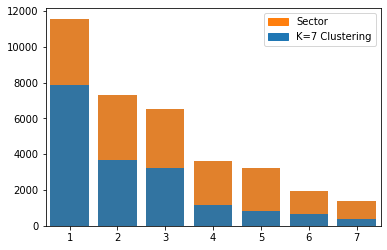

In [83]:
sns.barplot(x = np.arange(1,8,1), y = df.Sector.value_counts().values + df.No_in_Cluster_7.value_counts().values, color = sns.color_palette()[1], alpha = 1);
sns.barplot(x = np.arange(1,8,1), y = df.No_in_Cluster_7.value_counts().values, color = sns.color_palette()[0], alpha = 1);
plt.legend(handles = [patches.Patch(color = sns.color_palette()[1], label='Sector'), patches.Patch(color = sns.color_palette()[0], label = 'K=7 Clustering')]);

If we take a look at the frequency of the Clusters with the most elements and the Sectors with the most elements, sorted in descending order, we can see that the distributions of the counts do not seem similar for 5 out of 7 clusters/sectors. _Thus, it seems that we cannot draw any particular conclusion for a potential relation between the 7 Sectors of Chile and a clustering with 7 areas._

(_In the stacked bar plot above, the x-axis numbers "1, 2...." represent "the nth cluster and the nth sector, sorted by number of elements". For example, 2 means the 2nd biggest cluster (whichever that is) and the 2nd biggest sector, counting the number of elements. It does not mean sector 2 or cluster 2_).

---

<a id='insights'></a>
## Part 4: _<u>Insight Exploration</u>_

Now that we have understood our dataset much more clearly, and have cleaned and prepared the dataset for analysis, let us move on to answering some insightful questions about this dataset. 

There are two main questions that are of great interest to us within this project. __One is directly related to the nature of our Machine Learning task, and one is interesting from a feature correlation perspective.__

For our project, we have chosen the following ___2 research questions:___

__1.__ Considering that there are 10 different attributes pertaining to measuring accessibility, __what does the correlation between these 10 Accessibility attributes mean?__

   And, as sub-questions to this problem, we can ask:
   
   * _Are they all perhaps trying to show the same pattern?_ 
   * _What about correlation differences in measures between the PT and Car transport types?_
   * _If there is indeed strong correlation, perhaps we can get a general understanding of accessibility by just plotting one variable instead of 10?_
   
__2.__ Considering that, for our predictive ML task, it has been strictly specified that we should use a _test set_ between the boundary region of coordinates (33.4, 33.5) Lat & (-70.7, -70.6) Lon, we are concerned of the homogenity of the test data (within that border) in relation to the _training data_. __For our predictive challenge, how well does our ML test dataset resemble our training dataset?__

   And, as sub-questions to this problem, we can ask:
   
* _What is the reason why that specific border has been selected to be used as test dataset for our ML models?_

We will take these questions step-by-step, and answer them here, beginning with our 1st research question:

### Part 4.1: _<u>What does the correlation between the 10 Accessibility attributes mean?</u>_

In order for us to answer this question, we will create a new dataframe with a slightly different format, so that accessibility values are better grouped and delimited by the transport type (i.e. PT or Car).

In [84]:
access_df = pd.DataFrame({}, columns = ['Commerce_Accessibility', 'Education_Accessibility', 'Household_Accessibility', 'Industry_Accessibility', 'Services_Accessibility', 'Transport_Type'])

access_df['Commerce_Accessibility'] = np.hstack((np.array(df.Commerce_Accessibility_PT), np.array(df.Commerce_Accessibility_Car)))
access_df['Education_Accessibility'] = np.hstack((np.array(df.Education_Accessibility_PT), np.array(df.Education_Accessibility_Car)))
access_df['Household_Accessibility'] = np.hstack((np.array(df.Household_Accessibility_PT), np.array(df.Household_Accessibility_Car)))
access_df['Industry_Accessibility'] = np.hstack((np.array(df.Industry_Accessibility_PT), np.array(df.Industry_Accessibility_Car)))
access_df['Services_Accessibility'] = np.hstack((np.array(df.Services_Accessibility_PT), np.array(df.Services_Accessibility_Car)))

access_df.iloc[0:(len(access_df) // 2)]['Transport_Type'] = 'PT'
access_df.iloc[(len(access_df) // 2):]['Transport_Type'] = 'Car'

In [85]:
access_df.head()

,Commerce_Accessibility,Education_Accessibility,Household_Accessibility,Industry_Accessibility,Services_Accessibility,Transport_Type
0,704.97642,406.0983,6110.62492,671.08681,719.84272,PT
1,704.97642,406.0983,6110.62492,671.08681,719.84272,PT
2,704.97642,406.0983,6110.62492,671.08681,719.84272,PT
3,704.97642,406.0983,6110.62492,671.08681,719.84272,PT
4,704.97642,406.0983,6110.62492,671.08681,719.84272,PT


___Let us try and understand what is the correlation between the different measures of accessibily, separated by Transport Type:___

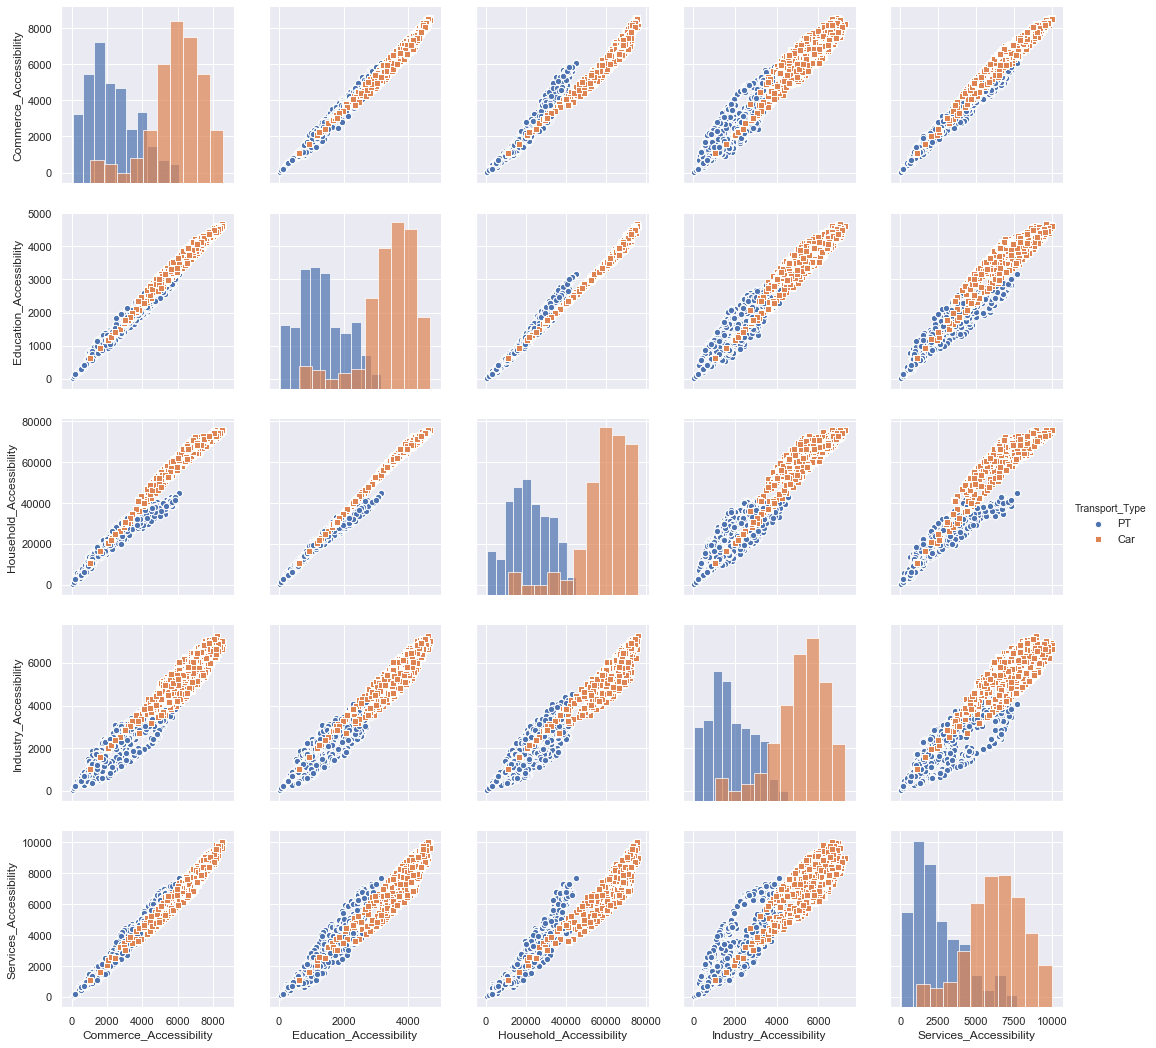

In [86]:
sns.set()

g = sns.PairGrid(access_df, hue = 'Transport_Type', hue_kws = {'marker': ["o", "s"]})
g.fig.set_size_inches(15, 15)
g = g.map_diag(plt.hist, edgecolor = 'w', alpha = 0.7)
g = g.map_offdiag(plt.scatter, edgecolor = "w", s = 40)
g = g.add_legend()

sns.set()

___This pair grid of plots allows us to understand the following aspects regarding our data:___

* ___The correlation between any two kinds of accessibilty measures seems to be very high,___ ranging from <u>almost identical</u> (e.g. see _Education <--> Household_ accessibility comparison) to <u>rather high scores</u> (e.g. "lowest" correlation between two measures seems to be between _Industry <--> Services_);
* By looking at the histogram distributions for any kind of measure, we can see that ___Public Transportation will always have lower expected range of values compared to the Car measures___;
* ___For any individual accessiblity measure, we can expect to see less variance in the distribution of the Car measurements, compared to the PT ones___ (since Car measurements mainly keep a straight line pattern, while the PT scatterpoints are represented with some slight curves in some of the measures);

In [87]:
class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

Data Visualisation is powerful, and, being honest with ourselves, we felt as if the above graph is packing a lot of information, and therefore may become a bit harder to read the conclusions off it. Therefore, keeping the same data and analysis pattern, we will want to represent the above pair grid of scatterplots into __two paired grids__ of accessibility measures, separated  by the transport type, one on the left side (___shown with blue dots___) representing measures of Public Transport type, and on the right side (___shown with orange squares___) representing Car type measures. 

Our visualization library, Seaborn, unfortunately does not easily allow subplotting of PairGrids, since they are in themselves an aggregation of subplots. Fortunately, through the code created above by _ImportanceOfBeingErnest_ from: https://stackoverflow.com/questions/35042255/how-to-plot-multiple-seaborn-jointplot-in-subplot, we were able to represent this pattern of data.

The conclusions you should take from the visualisation below are __the same__ as written above, however we argue that the joint paired grids of scatter plots (below) allows us to better illustrate the higher variance of the PT data across different measures, whereas Car type accessibility data keeps a more compact form, which reduces variance and increases corellation between the attributes:

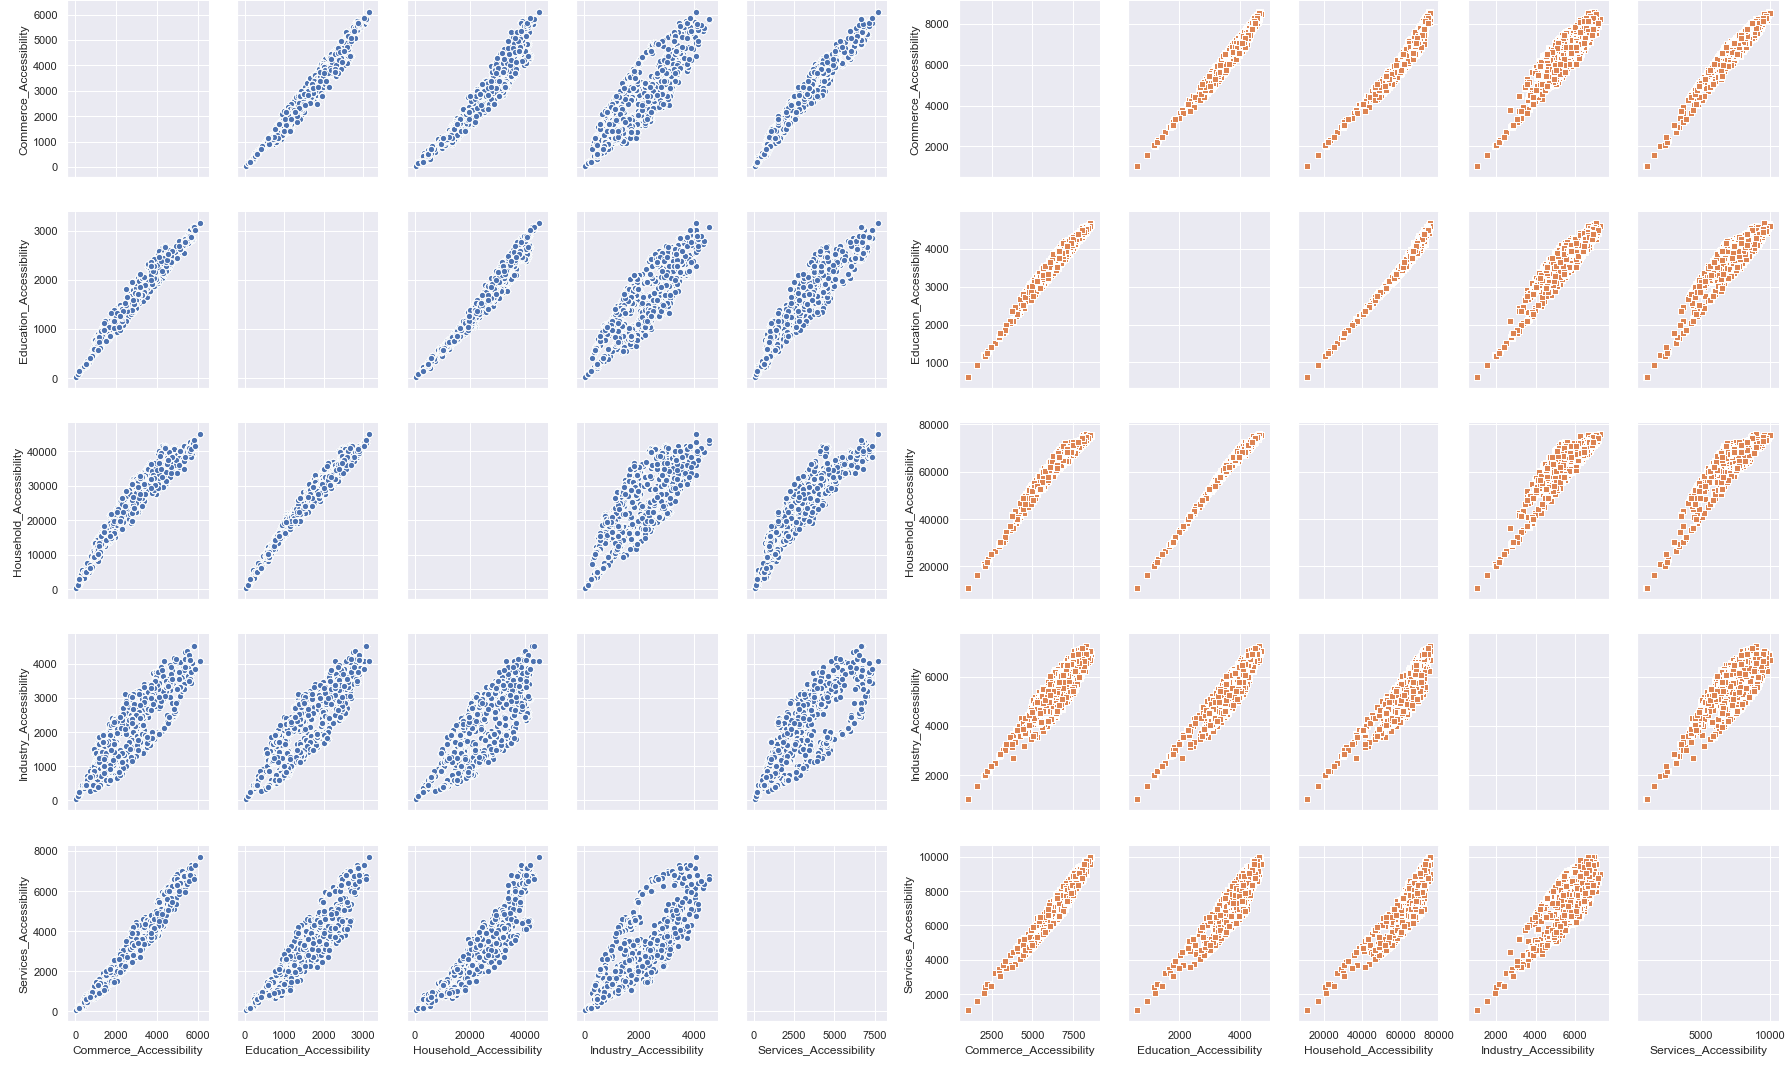

In [88]:
# The PairGrid corresponding to Public Transport accessibility
g1 = sns.PairGrid(access_df[access_df.Transport_Type == 'PT'])
g1.fig.set_size_inches(15, 15)
g1 = g1.map_offdiag(plt.scatter, edgecolor = "w", s = 40, color = sns.color_palette()[0], marker = 'o')
# g1 = g1.fig.suptitle('Scatterplot comparison of individual Accessibility measures within the PT category', y = 1.00)

# The PairGrid corresponding to Car accessibility
g2 = sns.PairGrid(access_df[access_df.Transport_Type == 'Car'])
g2.fig.set_size_inches(15, 15)
g2 = g2.map_offdiag(plt.scatter, s = 40, edgecolor = "w", color = sns.color_palette()[1], marker = 's')
# g2 = g2.fig.suptitle('Scatterplot comparison of individual Accessibility measures within the Car category', y = 1.00)

fig = plt.figure(figsize=(25, 15))
gs = gridspec.GridSpec(1, 2)

mg0 = SeabornFig2Grid(g1, fig, gs[0])
mg1 = SeabornFig2Grid(g2, fig, gs[1])

gs.tight_layout(fig)

plt.show()

In [89]:
# plt.figure(figsize = [12, 4])

# plt.subplot(1, 2, 1)
# sns.heatmap(df[['Commerce_Accessibility_PT', 'Education_Accessibility_PT', 'Household_Accessibility_PT', 'Industry_Accessibility_PT', 'Services_Accessibility_PT']].corr(), cmap = 'RdYlGn', annot = True, vmax = 1, vmin = 0.82, cbar = False);
# plt.title('Pair-wise correlation coefficients across attributes');

# # fix for mpl bug that cuts off top/bottom of seaborn viz
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

# ax = plt.subplot(1, 2, 2)
# sns.heatmap(df[['Commerce_Accessibility_Car', 'Education_Accessibility_Car', 'Household_Accessibility_Car', 'Industry_Accessibility_Car', 'Services_Accessibility_Car']].corr(), cmap = 'RdYlGn', annot = True, vmax = 1, vmin = 0.82);
# plt.title('Pair-wise correlation coefficients across attributes');

# # fix for mpl bug that cuts off top/bottom of seaborn viz
# b, t = plt.ylim() # discover the values for bottom and top
# b += 0.5 # Add 0.5 to the bottom
# t -= 0.5 # Subtract 0.5 from the top
# plt.ylim(b, t) # update the ylim(bottom, top) values

Lastly here, let us answer the pressing question: __Can we get a general understanding of Accessibility by just looking at a single variable rather than 10?__

The answer has been hinted many times previously from the correlation of the scatterplots, however let us put exact numbers to the correlation values with pairwise comparisons between each of the 10 accessibility measures:

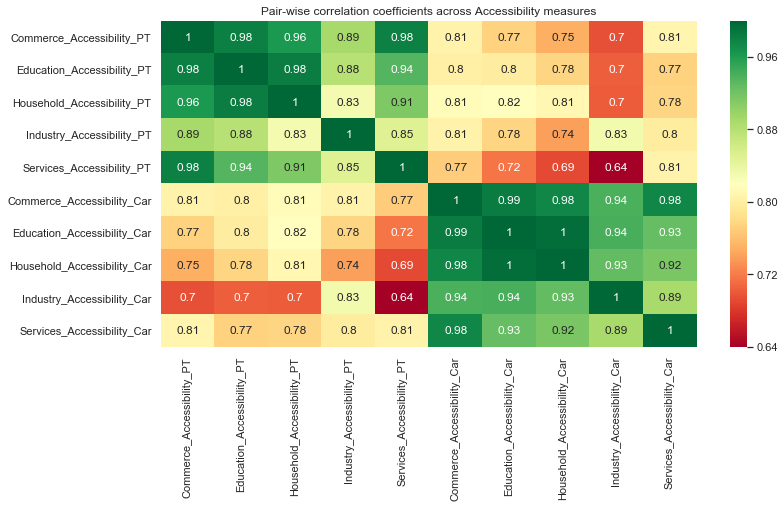

In [90]:
plt.figure(figsize = [12, 6])

sns.heatmap(df[['Commerce_Accessibility_PT', 'Education_Accessibility_PT', 'Household_Accessibility_PT', 'Industry_Accessibility_PT', 'Services_Accessibility_PT', 'Commerce_Accessibility_Car', 'Education_Accessibility_Car', 'Household_Accessibility_Car', 'Industry_Accessibility_Car', 'Services_Accessibility_Car']].corr(), cmap = 'RdYlGn', annot = True);
plt.title('Pair-wise correlation coefficients across Accessibility measures');

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values

Considering the correlation heatmap above, we can see that:

* PT measures represent each other well, with correlations between two PT measures being __>= 0.83__;
* Car measures represent each other extremely well, with most correlations between __>= 0.95__, and the lowest correlation between two Car measures being __0.89__;
* Even when considering correlations between a PT measure and a Car measure, we can see a high correlation between most of the variables (_with the sole exception of the combination: Industry_Car <--> Services_PT_), and with correlation values of __>= 0.70__

Thus, from all the analysis done for this set of 10 variables, we have shown and can approve that, ___on a relative scale, if we take one of the 10 accessibility measures and plot its values across the zones of Santiago, we can have high confidence that there will be a similar relative distribution of accessibility for any other of the 10 measures presented here.___

_Later, we will also need to consider how this will influence our Machine Learning classification models, since we are introducing many attributes here which are highly correlated with each other, and that might increase the dimensionality of our data without any major benefits in prediction._

---

### Part 4.2: _<u>For our predictive challenge, how well does our ML test dataset resemble our training dataset?</u>_

In order to answer this question, let us actually separate our data into the two subsets (even though we will not do any ML algorithm training here):

In [91]:
test_df = df[(df.Lat >= -33.5) & (df.Lat <= -33.4) & (df.Lon >= -70.7) & (df.Lon <= -70.6)]
train_df = df[df.index.isin(test_df.index) == False]

Now that we have separated our data, we would be very interested in visualising the two subsets on a map, in order to understand more properly the boundary between the training and test data.

For this geospatial analysis task, we will use the power of the ___Folium library___, which is a wrapper Python library for __Leaflet.js__, a leading open-source JavaScript library for mobile-friendly interactive maps. Along the way, we will also leverage the power of the ___Fiona library___, which reads and writes geographic data files and thereby helps Python programmers integrate geographic information within their scripts and analyses. 

As a start, let's try to make a list of all the latitude and longitude points that we want to represent on the map. These points are the same ones that were shown in the example map from the Data Science Challenge description file.

In [92]:
lat_border = np.arange(-33.9, -33.0, 0.1)
lon_border = np.arange(-71.3, -70.3, 0.1)

line_lat_points = [[tuple((round(lat,1), round(lon,1))) for lat in lat_border] for lon in lon_border]
line_lon_points = [[tuple((round(lat,1), round(lon,1))) for lon in lon_border] for lat in lat_border]

In [93]:
santiago_central_lat_lon = [-33.4489, -70.6693]

In [94]:
# Here, we initialize a new Map object with Folium
m = folium.Map(
    location = santiago_central_lat_lon,
    tiles = 'CartoDB positron',
    prefer_canvas = True, zoom_start = 10)

# For a random sample of 1/3 of the total Test Dataset available, plot the entries as points with a location on the map corresponding to the Lat-Lon coordinates
for _, entry in test_df[['Sector', 'Lat', 'Lon']].sample(int(len(test_df) / 3)).iterrows():
    # Add circle to map
    folium.Circle(
        radius = 20,
        location = [entry.Lat, entry.Lon],
        popup = str('Sector %d' % int(entry.Sector)),
        color = 'red',
        fill = True,
    ).add_to(m)
    
# For a random sample of 1/3 of the total Train Dataset available, plot the entries as points with a location on the map corresponding to the Lat-Lon coordinates
for _, entry in train_df[['Sector', 'Lat', 'Lon']].sample(int(len(train_df) / 3)).iterrows():
    # Add circle to map
    folium.Circle(
        radius = 20,
        location = [entry.Lat, entry.Lon],
        popup = str('Sector %d' % int(entry.Sector)),
        color = 'blue',
        fill = True,
    ).add_to(m)

# Plot the Latitude lines on the map
for single_latitude_line_points in line_lat_points:
    folium.PolyLine(single_latitude_line_points, color = "grey", weight = 1, opacity = 1).add_to(m)

# Plot the longitude lines on the map
for single_longitude_line_points in line_lon_points:
    folium.PolyLine(single_longitude_line_points, color = "grey", weight = 1, opacity = 1).add_to(m)

# Must save the map to HTML first, in order for it to show inside the Jupyter Notebook
m.save('map_plot_1.html')

# Display the map within an IPython IFrame 
display(IFrame(src = 'map_plot_1.html', width = 1600, height = 800)) 

The boundaries of looks quite clear. ___However, why did we choose exactly that parcel of Santiago as our dataset?___

We have a hunch that, by looking at the distribution of households within each Sector, we will understand more:

In [95]:
folium_colors = ['purple', 'green', 'darkred', 'cadetblue', 'orange', 'blue', 'black']

m = folium.Map(
    location = santiago_central_lat_lon,
    tiles = 'CartoDB positron',
    prefer_canvas = True, zoom_start = 10)

for sector in range(1,8):
    sectored_df = df[df.Sector == sector][['Sector', 'Lat', 'Lon']].sample(int(len(df[df.Sector == sector]) / 3))
    for _, entry in sectored_df.iterrows():
        # Add circle to map
        folium.Circle(
            radius = 20,
            location = [entry.Lat, entry.Lon],
            popup = str('Sector %d' % int(entry.Sector)),
            color = folium_colors[sector-1],
            fill = True,
        ).add_to(m)

for single_latitude_line_points in line_lat_points:
    folium.PolyLine(single_latitude_line_points, color = "grey", weight = 1, opacity = 1).add_to(m)

for single_longitude_line_points in line_lon_points:
    folium.PolyLine(single_longitude_line_points, color = "grey", weight = 1, opacity = 1).add_to(m)

m.save('map_plot_2.html')

The code below has been copied from the mentioned reference in order to show a legend of the different Sectors of Santiago, and their colors: 

In [96]:
# This code is adapted from a wonderful reference from here:
# https://nbviewer.jupyter.org/gist/talbertc-usgs/18f8901fc98f109f2b71156cf3ac81cd
# --------------------------------------------------------------------------------

from branca.element import Template, MacroElement

template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; left: 50px; top: 10px;'>
     
<div class='legend-title'>Sector Legend</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
  
    <li><span style='background:purple;opacity:0.7;'></span>Sector 1</li>
    <li><span style='background:green;opacity:0.7;'></span>Sector 2</li>
    <li><span style='background:darkred;opacity:0.7;'></span>Sector 3</li>
    <li><span style='background:cadetblue;opacity:0.7;'></span>Sector 4</li>
    <li><span style='background:orange;opacity:0.7;'></span>Sector 5</li>
    <li><span style='background:blue;opacity:0.7;'></span>Sector 6</li>
    <li><span style='background:black;opacity:0.7;'></span>Sector 7</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

macro = MacroElement()
macro._template = Template(template)

m.get_root().add_child(macro)

m.save('map_test.html')

In [97]:
display(IFrame(src = 'map_plot_2.html', width = 1600, height = 800)) 

If we take a look at the map now, and at the distribution of data within the sectors, __it suddenly becomes very clear why the map patch was selected to be our test dataset: _because it is the only patch from this entire map which contains data of households from 6 out of 7 sectors!___ The only sector which is "missing" data from our test dataset is Sector 7 (which we can find by looking at the distinctive colors of the sectors and the _draggable!_ map legend).

Since we have been given a database file with Polygons representing the different zones of Santiago, we would like to plot this data upon our Folium map to better understand the properties of our households.

__However, we have identified that our database file contains encoding errors in some of the names of Santiago's districts, and also the coordinates of the polygons are in UTM, therefore needing conversion__. Let us deal with these issues first:

In [98]:
def clean_subzone_dbf_file(area_dbf):
    corrupted_words = ['ConchalÃ\x83Â\xad', 'EstaciÃ\x83Â³n Central', 'MaipÃ\x83Âº', 'PeÃ\x83Â±aflor', 'PeÃ\x83Â±alolÃ\x83Â©n', 'San JoaquÃ\x83Â\xadn', 'San RamÃ\x83Â³n', 'Ã\x83â\x80\x98uÃ\x83Â±oa']
    cleaned_words = ['Conchalí', 'Estación Central', 'Maipú', 'Peñaflor', 'Peñalolén', 'San Joaquín', 'San Ramón', 'Ñuñoa']
    
    for _, subzone in santiago_area_dbf.items():
        if subzone['properties']['Comuna'] in corrupted_words:
            subzone['properties']['Comuna'] = cleaned_words[corrupted_words.index(subzone['properties']['Comuna'])]
        
    return area_dbf

In [99]:
def convert_utm_list_to_lat_lon_coord(area_dbf):
    for _, subzone in area_dbf.items():
        subzone_coordinates = []
        
        for X, Y in subzone['geometry']['coordinates'][0]:
            subzone_coordinates.append(utm.to_latlon(X, Y, zone_number = 19, northern = False))
        
        subzone['geometry']['coordinates'] = subzone_coordinates
        
    return area_dbf

In [100]:
santiago_area_dbf = dict(fiona.open('ZonasEOD2012.dbf'))
santiago_area_dbf = clean_subzone_dbf_file(santiago_area_dbf)
santiago_area_dbf = convert_utm_list_to_lat_lon_coord(santiago_area_dbf)

m = folium.Map(
    location = santiago_central_lat_lon,
    tiles = 'CartoDB positron',
    prefer_canvas = True, zoom_start = 10)

for _, subzone in santiago_area_dbf.items():
#     subzone_coordinates = []
    
#     for X, Y in subzone['geometry']['coordinates'][0]:
#         subzone_coordinates.append(utm.to_latlon(X, Y, zone_number = 19, northern = False))

    subzone_coordinates = subzone['geometry']['coordinates']
        
    folium.PolyLine(subzone_coordinates, color = "red", weight = 0.5, opacity = 1).add_to(m)
    
    subzone_polygon = path.Path(subzone_coordinates)
    
    leftmost_lat = min([tuple_coord[0] for tuple_coord in subzone_coordinates])
    rightmost_lat = max([tuple_coord[0] for tuple_coord in subzone_coordinates])
    topmost_lon = max([tuple_coord[1] for tuple_coord in subzone_coordinates])
    bottommost_lon = min([tuple_coord[1] for tuple_coord in subzone_coordinates])
    
    subzone_filtered_df = df[(df.Lat >= leftmost_lat) & (df.Lat <= rightmost_lat) & (df.Lon <= topmost_lon) & (df.Lon >= bottommost_lon)][['Household_ID', 'Lat', 'Lon', 'Sector']]
    
    subzone_filtered_df = subzone_filtered_df[subzone_filtered_df.apply((lambda row: subzone_polygon.contains_points([row[['Lat', 'Lon']]])[0] == True), axis = 1)]
    
    for _, entry in subzone_filtered_df.sample(int(len(subzone_filtered_df) / 10)).iterrows():
        
        circle_popup_html = """
            <div style="background-color: #cfc ; padding: 10px; border: 1px solid green;">
            <p style = 'font-family: helvetica; font-size: 14px'>
                Zone Name: <b>%s</b>,<br><br>
                Subzone ID: <b>%d</b>,<br><br>
                Subzone Area (ha): <b>%.2f</b>,<br><br>
                Household ID: <b>%s</b>,<br><br>
                Sector: <b>%d</b>
            </p>
        """ % (subzone['properties']['Comuna'], 
               subzone['properties']['ID'], 
               subzone['properties']['AREA-Ha'], 
               entry['Household_ID'],
               int(entry.Sector))
        
        branca_iframe = branca.element.IFrame(html = circle_popup_html, width = 250, height = 250)
        popup = folium.Popup(branca_iframe, max_width = 500)
        
        # Add circle to map
        folium.Circle(
            radius = 20,
            location = [entry.Lat, entry.Lon],
            popup = popup,
            color = 'blue',
            fill = True,
        ).add_to(m)
        
    
for single_latitude_line_points in line_lat_points:
    folium.PolyLine(single_latitude_line_points, color = "blue", weight = 1, opacity = 1).add_to(m)

for single_longitude_line_points in line_lon_points:
    folium.PolyLine(single_longitude_line_points, color = "blue", weight = 1, opacity = 1).add_to(m)

m.save('map_plot_3.html')
display(IFrame(src = 'map_plot_3.html', width = 1600, height = 800)) 

___By extracting the data from the given Zone database file, we have managed to create a highly interactive map, where each of the points represents a household, and by clicking on it, the details of the zone, subzone and household ID are available for view.___ This also allows us to understand how much data from each zone do we have, but we must mention that we only plot here a _tenth_ of the total data, in order to avoid clogging both the map and the computer that performs its computations.



__Since this map has been achieved well, let us combine all our previous efforts in visualising the Sector data of Santiago into this highly interactive format:__

In [101]:
folium_colors = ['purple', 'green', 'darkred', 'cadetblue', 'orange', 'blue', 'black']

santiago_area_dbf = dict(fiona.open('ZonasEOD2012.dbf'))

santiago_area_dbf = clean_subzone_dbf_file(santiago_area_dbf)

santiago_area_dbf = convert_utm_list_to_lat_lon_coord(santiago_area_dbf)

m = folium.Map(
    location = santiago_central_lat_lon,
    tiles = 'CartoDB positron',
    prefer_canvas = True, zoom_start = 10)


for _, subzone in santiago_area_dbf.items():
#     subzone_coordinates = []

#     for X, Y in subzone['geometry']['coordinates'][0]:
#         subzone_coordinates.append(utm.to_latlon(X, Y, zone_number = 19, northern = False))

    subzone_coordinates = subzone['geometry']['coordinates']
    
    folium.PolyLine(subzone_coordinates, color = "red", weight = 0.5, opacity = 1).add_to(m)

    subzone_polygon = path.Path(subzone_coordinates)

    leftmost_lat = min([tuple_coord[0] for tuple_coord in subzone_coordinates])
    rightmost_lat = max([tuple_coord[0] for tuple_coord in subzone_coordinates])
    topmost_lon = max([tuple_coord[1] for tuple_coord in subzone_coordinates])
    bottommost_lon = min([tuple_coord[1] for tuple_coord in subzone_coordinates])
        
    for sector in range(1,8):

        subzone_filtered_df = df[(df.Lat >= leftmost_lat) & (df.Lat <= rightmost_lat) & (df.Lon <= topmost_lon) & (df.Lon >= bottommost_lon) & (df.Sector == sector)][['Household_ID', 'Lat', 'Lon', 'Sector']]
        subzone_filtered_df = subzone_filtered_df[subzone_filtered_df.apply((lambda row: subzone_polygon.contains_points([row[['Lat', 'Lon']]])[0] == True), axis = 1)]

        for _, entry in subzone_filtered_df.sample(int(len(subzone_filtered_df) / 3)).iterrows():

            circle_popup_html = """
                <div style="background-color: #cfc ; padding: 10px; border: 1px solid green;">
                <p style = 'font-family: helvetica; font-size: 14px'>
                    Zone Name: <b>%s</b>,<br><br>
                    Subzone ID: <b>%d</b>,<br><br>
                    Subzone Area (ha): <b>%.2f</b>,<br><br>
                    Household ID: <b>%s</b>,<br><br>
                    Sector: <b>%d</b>
                </p>
            """ % (subzone['properties']['Comuna'], 
                   subzone['properties']['ID'], 
                   subzone['properties']['AREA-Ha'], 
                   entry['Household_ID'],
                   int(entry.Sector))

            branca_iframe = branca.element.IFrame(html = circle_popup_html, width = 250, height = 250)
            popup = folium.Popup(branca_iframe, max_width = 500)

            # Add circle to map
            folium.Circle(
                radius = 20,
                location = [entry.Lat, entry.Lon],
                popup = popup,
                color = folium_colors[sector-1],
                fill = True,
            ).add_to(m)
        
    
for single_latitude_line_points in line_lat_points:
    folium.PolyLine(single_latitude_line_points, color = "blue", weight = 1, opacity = 1).add_to(m)

for single_longitude_line_points in line_lon_points:
    folium.PolyLine(single_longitude_line_points, color = "blue", weight = 1, opacity = 1).add_to(m)

m.save('map_plot_4.html')
display(IFrame(src = 'map_plot_4.html', width = 1600, height = 800)) 

Through this interactive visualization, we can quickly and easily check multiple sets of households from different zones and sectors, and, having done so, this reinforced our conclusion that the geographical boundary for the test dataset of our challenge is the one patch of data which indeed best resembles our training dataset.

---

<a id='dataaug'></a>
## Part 5: _<u>Data Augmentation</u>_

Considering that now we have parsed and formatted the DBF file corresponding to the zones of Santiago, we realized: __Our original dataset has many attributes related to zone measurements, however we do not actually know in which zones do the different households lie.__ Perhaps this is not the most important question, since this would be a variable that would strongly correlate with any other measurements related to a specific zone.

However, we have decided to augment our dataset with trying to understand, for each particular household, what is the ___dataset density by zone area___, the ___dataset density by subzone area___, and their ratio.

More precisely, the ___dataset density by zone area___ refers to the number of houses present within the total area size (in Ha) of the zone. While you can consider it a relative measure, since not all houses have the same size, we argue that this measurement gives you a relative idea of how much of an area (in percentage) is it represented by houses which are present in our dataset. This means that the closer this value will be 1, the more houses we will have stored in our dataset from a particular zone, so the more likely we are to have a clear picture of the housing situation within that zone (since we have more data from the zone). Similarily, the ___dataset density by subzone area___ is the number of houses present within the total area of a subzone. 

In [102]:
zones_total_area_dict = {}

for _, subzone in santiago_area_dbf.items():
    if (subzone['properties']['Comuna'] not in zones_total_area_dict):
        zones_total_area_dict[subzone['properties']['Comuna']] = subzone['properties']['AREA-Ha']
    else:
        zones_total_area_dict[subzone['properties']['Comuna']] += subzone['properties']['AREA-Ha']
        
for name, value in zones_total_area_dict.items():
    zones_total_area_dict[name] = round(value, 2)

In [103]:
for _, subzone in santiago_area_dbf.items():
    subzone_coordinates = subzone['geometry']['coordinates']
    
    subzone_polygon = path.Path(subzone_coordinates)
    
    leftmost_lat = min([tuple_coord[0] for tuple_coord in subzone_coordinates])
    rightmost_lat = max([tuple_coord[0] for tuple_coord in subzone_coordinates])
    topmost_lon = max([tuple_coord[1] for tuple_coord in subzone_coordinates])
    bottommost_lon = min([tuple_coord[1] for tuple_coord in subzone_coordinates])
    
    subzone_filtered_df = df[(df.Lat >= leftmost_lat) & (df.Lat <= rightmost_lat) & (df.Lon <= topmost_lon) & (df.Lon >= bottommost_lon)]
    subzone_filtered_df = subzone_filtered_df[subzone_filtered_df.apply((lambda row: subzone_polygon.contains_points([row[['Lat', 'Lon']]])[0] == True), axis = 1)]
    
    df.loc[subzone_filtered_df.index, 'Zone_Name'] = subzone['properties']['Comuna']
    df.loc[subzone_filtered_df.index, 'Zone_Area'] = zones_total_area_dict[subzone['properties']['Comuna']]
    df.loc[subzone_filtered_df.index, 'Subzone_ID'] = subzone['properties']['ID']
    df.loc[subzone_filtered_df.index, 'Subzone_Area'] = subzone['properties']['AREA-Ha']

In [104]:
df.dropna(axis = 0, inplace = True)
df.Subzone_ID = df.Subzone_ID.astype(int)

In [105]:
for _, subzone in santiago_area_dbf.items():
    subzone_filtered_df = df[df.Subzone_ID == subzone['properties']['ID']]
    
    dataset_density_by_zone_area = len(df[df.Zone_Name == subzone['properties']['Comuna']]) / zones_total_area_dict[subzone['properties']['Comuna']]
    dataset_density_by_subzone_area = len(df[df.Subzone_ID == subzone['properties']['ID']]) / subzone['properties']['AREA-Ha']
    
    df.loc[subzone_filtered_df.index, 'Dataset_Density_by_Zone_Area'] = dataset_density_by_zone_area
    df.loc[subzone_filtered_df.index, 'Dataset_Density_by_Subzone_Area'] = dataset_density_by_subzone_area
    df.loc[subzone_filtered_df.index, 'Dataset_Coverage_of_Zone_by_Subzone'] = dataset_density_by_subzone_area * dataset_density_by_zone_area

__Moreover, in order to increase the chances that we have relevant attributes in our dataset which can be good separators for what household types buy houses in different areas of the city, we will use the power of _OpenSourceMaps_ in order to collect data about places of interest (POI) near and around the neighbourhood of each individual house, which should provide easy access to them.__

We will use a radius of 0.1 units, which corresponds to approximatively 11.4 km as the circular area surrounding the houses, in which we will perform our search for parameters.

In [104]:
r = 0.1 # approximately 11.4 km 

def retrieveData(obj):
    overpass_url = "http://overpass-api.de/api/interpreter"
    overpass_query = """
                        [out:json];
                        {0}({1},{2},{3},{4});
                        out center;
                     """.format(obj, min(df.Lat)-r, min(df.Lon)-r, max(df.Lat)+r, max(df.Lon)+r)
    
    response = requests.get(overpass_url, params={'data': overpass_query})
    return response.json()

def addCol(data):
    if data['elements'][0]['type'] == 'way':
        data = pd.DataFrame(list(pd.DataFrame(data['elements'])['center']))
    elif data['elements'][0]['type'] == 'node':
        data = pd.DataFrame(data['elements'])
        
    col = []
    for _, house in df.iterrows():
        count = 0
        for _, rest in data.iterrows():
            if house.Lat-r <= rest.lat<=house.Lat+r and house.Lon-r <= rest.lon <= house.Lon+r:
                count += 1
        col.append(count)
    return col

We will append to the dataframe a list of amenities which we might find relevant for separating different classes of people in general throughout the world, making an inference that they will also be relevant in our context.

___We have selected as POIs: restaurants, Churches, libraries, schools, convenience stores, cinemas, shopping centres (malls), bars, parks and industrial centres.___

In [69]:
# Will take lots of time to extract the data!! 
res = retrieveData('node["amenity" = "restaurant"]')
df['Nr_restaurants'] = addCol(res)

In [10]:
chu = retrieveData('node["amenity" = "place_of_worship"]')
df['Nr_churches'] = addCol(chu)

In [11]:
lib = retrieveData('node["amenity" = "library"]')
df['Nr_libraries'] = addCol(lib)

In [49]:
sch = retrieveData('node["amenity" = "school"]')
df['Nr_schools'] = addCol(sch)

In [20]:
sup = retrieveData('node["shop" = "supermarket"]')
df['Nr_supermarkets'] = addCol(sup)

In [27]:
cin = retrieveData('node["amenity" = "cinema"]')
df['Nr_cinemas'] = addCol(cin)

In [30]:
mal = retrieveData('node["shop" = "mall"]')
df['Nr_malls'] = addCol(mal)

In [46]:
bar = retrieveData('node["amenity" = "bar"]')
df['Nr_bars'] = addCol(bar)

In [72]:
par = retrieveData('node["leisure" = "park"]')
df['Nr_parks'] = addCol(par)

In [105]:
ind = retrieveData('way["landuse" = "industrial"]')
df['Nr_industrial'] = addCol(ind) # number of industrial nuclei

_With this augmentation of our dataset, we are ready to explore future data modeling for inputting into Machine Learning models, and performing predictions upon our data, in the next notebook._

Lastly, after performing this augmentation, we will store the final data within a CSV file:

In [106]:
df.to_csv('Households_Data_Processed.csv', index = False)

---

___As a conclusion to our Exploratory notebook, we have formatted, cleaned, augmented and generated insights from our dataset within this detailed Descriptive Notebook.___

__In regards to the research questions asked in this notebook, we have found the following information:__

1. For Research Question 1:
 * _The 10 accessibility measures present in this dataset are all strongly correlated between each other._
 * _Regardless of whether we compare two measures from the same Transport Type, or whether we compare two measures from different Transport Types, there will be a significant similarity in the relative pattern of association between these variables, indicating the strong correlation._
 * _Many times, the zones of Santiago will report a lower Accessibility for Public Transport than for cars. If PT accessibility is high, then definitely Car accessibility is also high. Likewise, if Car accessibility is low, then definitely PT accessibility will also be low._
 * _We need to watch out for the strong collinearity of these 10 variables when introducing them into our ML datasets._
 
 
2. For Research Question 2:
 * _We have found out that the geographical boundary for the test dataset has been selected since it best represents the training dataset by having included data from 6 out of 7 sectors of Santiago de Chile._
 
In our second notebook, we will delve into converting the data into matrix-ready form for the ML algorithms to ingest, and perform all the necessary steps for training ML classification algorithms which will predict the household types from the data analyzed and manipulated here.

---

<a id='review'></a>
## Part 6: _<u>Review of modeling versions</u>_

In this notebook, we would like to guide our readers in understanding how multiclass supervised machine learning algorithm practices were conducted upon our task at hand. 

___What you will see in this notebook is a clean, fluid version of the workflow of ML modeling.___ _Yet, behind the scenes, we could not arrive at the "fluidity" seen here without performing multiple cycles of MODELING --> RESULTS --> OPTIMIZE/SELECT MOST RELEVANT DATASET FEATURES --> MODELING --> RESUlTS --> ADD/CREATE MORE RELEVANT FEATURES TO THE DATASET --> MODELING --> RESULTS --> ..._.

In total, there were 7 different versions of our dataset that we have continously prepared, inputted, tested and optimized in our "backstage" research about how to tackle this complex mobility problem most efficiently. From having spread our code and analysis over 3 full, large notebooks, we have understood that it is not reasonable, relevant or "beautiful" to include all the analysis done upon the 7 dataset versions into this final presentation notebook, since the analysis required mostly the same code as will be presented here, except slightly tweaked variations of the same processing, with the hope of producing more accurate results. This did not turn out to be the case, probably due to the massive complexity of our task, and each of the versions ended up ___giving $\pm$ 1-2% changes in accuracy or F1 scoring.___

For reference, we will outline here the 7 different manipulations used upon our dataset, along with their specific additions:

* ___Version 1:___ Includes all ___non-household-related___ variables of our dataset. The 4 categorical variables: _Sector, No_in_Cluster_2, No_in_Cluster_7_ and _Zone_Name_ have been one-hot-encoded, giving this dataset a high dimensionality (when PCA was not applied). Highly-correlated variables have NOT been removed from the dataset. The OpenStreetMaps data was not added at this point. This dataset has been tested both with and without PCA applied upon the numerical variables.

* ___Version 2:___ Same as Version 1,  with the addition that all the categorical variables have been ___dropped___ instead of being one-hot encoded. ___This has been done since we have realized that none of our 4 categorical variables could contribute well to the training of a non-overfitted model.___ More specifically, from a geographical point of view, most of the Zones within the test set cannot be found within the training set, since our test set is bounded geographically. The other categorical variables were dropped in an attempt to reduce the dimensionality of the data without needing to apply PCA. It was not necessary to do so, we were simply experimenting with the models. The OpenStreetMaps data was not added at this point. This dataset has been tested both with and without PCA applied upon the numerical variables.

* ___Version 3:___ Same as Version 2, with the addition that ___all of the multicollinear variables (which were correlated at the same time) have been dropped, including 9/10 Accessiblity variables___ (since the analysis performed in the previous notebook has shown us that most of the Accessiblity variables were actually showing the same data pattern. This has greatly reduced the dimensionality of the dataset. The OpenStreetMaps data was not added at this point. This dataset has been tested both with and without PCA applied upon the numerical variables.

* ___Version 4: (for experimenting purposes only!)___ Since we noticed that our models had strong difficulty to predict the correct household classes from the given training and testing dataset given, we have decided to check and compare the results of our model within ___low difficulty predictive conditions___, where we included in the modeling dataset all the variables related to household information, such as average income or years of education. As expected, our models have begun to perform extremely well on predictions from validation sets taken from the initial training data, however it was interesting to notice that even this type of model had minimal improvement in accuracy (_~57.03% accuracy_) when it came to predictions upon the test data. Most likely, this is because the data from the test is largely different in terms of combined values of all attributes, since we are testing on data from the central area of Santiago city, compared to the training data which is collected within the outer suburbs and from the neighboring regions of Santiago. The model overfitted the problem on our training data with its specific properties, however it could not adapt further to the test data. __This experiment shows us that the data from the training and testing tests is widely dissimilar in distribution.__ The OpenStreetMaps data was not added at this point. 

* ___Version 5: (for experimenting purposes only!)___ Taking Version 4 one step further, ___we wanted to check what the minimum error of an ML algorithm would be upon our dataset.___ Thus, we have disregarding the geospatial separation between the data from training and testing, and have both trained and also tested the models on the full data. This means that we have tested the models on the same data that we have trained them upon, which is clearly not good practice, however we have tried to do this experiment to understand what would be the minimum error to expect from models in our conditions, even if everything is available to them. As expected, the models performed really well this time, however, in with this situation, there was an error of ~5.88% (_i.e. 94.22% accuracy_) for predicting results. __This experiment shows us that the problem we are working with is indeed of a complex nature, and adding more relevant features into our dataset could explain more of the variation of our data.__ The OpenStreetMaps data was not added at this point. 

* ___Version 6:___ In Version 6 and 7, ___we experimented with adding more features to the initial dataset by using the power of the OpenStreetMaps API.___ You have probably seen already how we have performed this data augmentation process in Notebook 1 of our analysis. Even though this step is presented in this project as occuring before the ML modeling begins, in reality we have added this data late in the analysis process, after we have concluded that our current variables were not enough to achieve accurate predictions of the problem. Sadly, we have quickly realized that even these additional variables only brought a ___+1.00% improvement to___ our accuracy scores overall, and the F1 scores remained largely similar as well. In version 6, we have __added the number of _Churches, libraries, supermarkets, cinemas and malls_ within a radius of 0.1', approximatively 11.4km around the household.__ 

* ___Version 7:___ Version 7 simply builds upon Version 6 and adds more features related to points of interest, based on the power of OpenStreetMaps API. ___The additional variables refer to the number of bars and pubs, schools, restaurants, parks and industry locations.___

Since all of the non-experimental dataset versions have given minimal (close to none) increase in the result scoring, for this notebook, we have compiled a version of our dataset that balances dimensionality with prediction power.

---

<a id='scoring'></a>
## Part 7: _<u>Defining the scoring methods</u>_

### _Part 7.1: Establishing a baseline for model accuracy comparison_

Before starting any complex work in the realm of Supervised Learning and being happy or sad about the prediction scoring of our models, we need to understand what exactly are we comparing these scores against. 

It is not reasonable to compare e.g. accuracy scores in prediction to the 0% threshold, since even pure random-guessing will still allow you to correctly guess _some_ fraction of the total entries. Instead, let us think about a logical baseline. One that is reasonable (and also highly used in literature) is the baseline where all classes are predicted as the most frequent of the classes in the dataset, therefore ensuring a safe maximization of potenial "win" situations where we have absolutely no other data available for us to guess upon. 

We will use that baseline for comparison of our two metrics used in this analysis: F1-score and accuracy.

___Let us take a look again at the distribution of our classes within our dataset:___

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show, clim, semilogx, loglog, title, subplot, grid
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn import model_selection

from scipy import stats

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('Households_Data_Processed.csv', index_col = 'Household_ID')

__We will only select and use the columns which do not tell us direct information about a household's type, such as *Income* or *Education Level*. Thus, we have made a list of 'allowed' variables that we will use throughout this dataset__.

In [3]:
ML_columns = ['Sector', 'Lat', 'Lon', 'Household_Type', 'Avg_Residential_Surface_Area',
              'Avg_Construction_Quality', 'Total_Building_Density_per_Zone',
              'KM_Nearest_Subway', 'KM_Nearest_Highway', 'CBD_Travel_Time',
              'Avg_Zonal_Income', 'Commerce_Accessibility_PT',
              'Education_Accessibility_PT', 'Household_Accessibility_PT',
              'Industry_Accessibility_PT', 'Services_Accessibility_PT',
              'Commerce_Accessibility_Car', 'Education_Accessibility_Car',
              'Household_Accessibility_Car', 'Industry_Accessibility_Car',
              'Services_Accessibility_Car', 'No_in_Cluster_7', 'No_in_Cluster_2', 
              'Zone_Name', 'Zone_Area', 'Subzone_Area', 'Dataset_Density_by_Zone_Area',
              'Dataset_Density_by_Subzone_Area', 'Dataset_Coverage_of_Zone_by_Subzone',
              'Nr_churches', 'Nr_libraries', 'Nr_supermarkets', 'Nr_cinemas', 'Nr_malls',
              'Nr_bars', 'Nr_schools', 'Nr_restaurants', 'Nr_parks', 'Nr_industrial']

df = df[ML_columns]

df.Sector = df.Sector.astype('category')
df.No_in_Cluster_2 = df.No_in_Cluster_2.astype('category')
df.No_in_Cluster_7 = df.No_in_Cluster_7.astype('category')
df.Zone_Name = df.Zone_Name.astype('category')

In [4]:
print('The percentage of household type 1 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 1]) * 100 / len(df)))
print('The percentage of household type 2 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 2]) * 100 / len(df)))
print('The percentage of household type 3 responses in the dataset is: %.2f%% of the total number of entries.' % (len(df[df.Household_Type == 3]) * 100 / len(df)))

The percentage of household type 1 responses in the dataset is: 37.15% of the total number of entries.
The percentage of household type 2 responses in the dataset is: 43.59% of the total number of entries.
The percentage of household type 3 responses in the dataset is: 19.26% of the total number of entries.


According to the percentages above, we can easily see that household type 2 is the most common type in our data, therefore, __the simplest baseline model would give on the overall dataset a prediction accuracy of 43.59%__ 

We are particularly interested in seeing how the models perform on the test set, and from our previous analysis, we can expect that the distribution of classes will be different in the test set than in the training set. Since we will normally not have access to the "test" data at all until after the full training of the models, _we cannot compare the accuracy received by a model during training with the "test" baseline_, yet it would be accurate to take the accuracy baseline as the frequency of the most common class _in the training set_.

Let us separate our separate our data into the training and testing data, and perform this check:

In [4]:
test_df = df[(df.Lat >= -33.5) & (df.Lat <= -33.4) & (df.Lon >= -70.7) & (df.Lon <= -70.6)]
train_df = df[df.index.isin(test_df.index) == False]

In [5]:
test_df.drop(['Lat', 'Lon'], axis = 1, inplace = True)
train_df.drop(['Lat', 'Lon'], axis = 1, inplace = True)

In [8]:
print('Within the TRAINING dataset, the percentage of household type 1 responses in the dataset is: %.2f%% of the total number of entries.' % (len(train_df[train_df.Household_Type == 1]) * 100 / len(train_df)))
print('Within the TRAINING dataset, the percentage of household type 2 responses in the dataset is: %.2f%% of the total number of entries.' % (len(train_df[train_df.Household_Type == 2]) * 100 / len(train_df)))
print('Within the TRAINING dataset, the percentage of household type 3 responses in the dataset is: %.2f%% of the total number of entries.' % (len(train_df[train_df.Household_Type == 3]) * 100 / len(train_df)))

Within the TRAINING dataset, the percentage of household type 1 responses in the dataset is: 39.63% of the total number of entries.
Within the TRAINING dataset, the percentage of household type 2 responses in the dataset is: 43.63% of the total number of entries.
Within the TRAINING dataset, the percentage of household type 3 responses in the dataset is: 16.74% of the total number of entries.


Since the training set occupies 83.5% of the total dataset, it looks normal that the distribution of classes would not deviate too much from the original numbers, since the number of dislocated entries is small and the classes were somewhat balancedly distributed from the start. __We will select our baseline accuracy to the percentage of the distribution of class(or type) 2 within the training dataset, namely 43.63%.__

In [9]:
baseline_accuracy = np.round((len(train_df[train_df.Household_Type == 2]) / len(train_df)), decimals = 3)
print('The baseline threshold for accuracy is: ', baseline_accuracy)

The baseline threshold for accuracy is:  0.436


---

### _Part 7.2: Establishing a baseline for F1-score comparison_

Computing the F1 baseline score for this dataset is slightly more complex, since this is a multiclass problem. Because we are dealing with more than 2 classes, we need to clearly define how the F1 score will be computed. 

There are three major ways to compute the global F1 score of a multiclass problem, each relying on a slightly different method of averaging the class-by-class precision and recall scores: ___micro-average F1, macro-average F1 and weighted-average F1 score___. There are advantages and disadvantages for each method, according to <u>[source 1](https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1)</u>, <u>[source 2](https://simonhessner.de/why-are-precision-recall-and-f1-score-equal-when-using-micro-averaging-in-a-multi-class-problem/)</u> and <u>[source 3](https://datascience.stackexchange.com/questions/15989/micro-average-vs-macro-average-performance-in-a-multiclass-classification-settin)</u>.

The micro-average F1 is good for high class-imbalance datasets, since it aggregates the contributions of all classes to compute the average metric, however the potential downside is that its computed accuracy equals both its precision and also its recall, therefore the harmonic mean (_i.e. F1 score_) will also be equal to its accuracy. 

The macro-average F1 does not take into account class imbalance, however it will compute the metric independently for each class and then take the average (therefore also treating all classes equally). 

A weighted-average F1 is a variant of the macro-average F1, in which each class contribution to the average is being weighted by the relative number of examples available for it. We have selected this type of F1 metric as being most relevant to our project, since we do not have strong issues of class imbalance and also since it separates the precision and recall of each individual class, thus allowing us to have separate results for accuracy and F1 score.

**_Using the weighted macro F1 formula, we will compute the baseline in the most simple case scenario where the most frequent class is always predicted._**

We need to mention that, if this prediction strategy is constant, all precision and recall values __except__ for the highest-frequeny class will result in 0, since there will be no True Positives found (and that is the numerator of both scores' equations). The weighed average method requires us to multiply the remaining one precision and recall values by the "weight" of the high-frequency class upon the training dataset, i.e. how many entries does this class encompass, out of the total number of entries in the dataset.

In [10]:
highest_class_percentage = (len(train_df[train_df.Household_Type == 2]) * 100 / len(train_df))

# This is only the precision from the predicted class, since the other precisions are equal to 0 because there are no TPs
weighted_precision_for_most_frequent_class = highest_class_percentage * (highest_class_percentage / train_df.shape[0])

# This is only the recall from the predicted class, since the other precisions are equal to 0 because there are no TPs. 
# For the predicted class, the recall is 1 since obviously predicting the highest class will mean we will classify all its own instances correctly
weighted_recall_for_most_frequent_class = highest_class_percentage * 1

# The calculation of the F1 score is the harmonic mean of the global (macro or micro) precision and recall values
baseline_f1_weigted_macro_avg = np.round((2 * weighted_precision_for_most_frequent_class * weighted_recall_for_most_frequent_class) / (weighted_precision_for_most_frequent_class + weighted_recall_for_most_frequent_class), decimals = 3)

print('The baseline threshold for F1 score is: ', baseline_f1_weigted_macro_avg)

The baseline threshold for F1 score is:  0.255


---

### _Part 7.3: Define computationally the scoring function_

_Based on the above-mentioned considerations, we have decided to implement an evaluation function that will be used further in the testing of our models:_

In [6]:
def evaluate(y_true, y_pred, print_confusion_matrix = False, print_accuracy = False, print_error_rate = False, print_f1_score = False, use_weighted_average = True):
#     When wanting to compute MICRO-average instead of MACRO, uncomment the codes below:

#     precision_micro_average_numerator = 0
#     precision_micro_average_denominator = 0
#     recall_micro_average_numerator = 0
#     recall_micro_average_denominator = 0

    precision_macro_average = 0
    recall_macro_average = 0
    
    c_matrix = confusion_matrix(y_true, y_pred)
    
    if (print_confusion_matrix == True):
        print('Confusion matrix\n- x-axis is true labels \n- y-axis is predicted labels')
        print(c_matrix)
        print()
    
    for i in range(0, len(np.unique(y_true))):
        # From the multiclass confusion matrix, we will calculate the TP, FP and FN for each class individually, 
        # so that we can compute the precision and recall scores of each class individually
        
        tp = c_matrix[i, i]
        fp = c_matrix[0:i, i].sum() + c_matrix[i+1:, i].sum()
        fn = c_matrix[i, 0:i].sum() + c_matrix[i, i+1:].sum()
        # tn = confusion_matrix.sum() - tp - fp - fn (No need for it here to be computed)
        
#         Uncomment for MICRO-average computation:

#         precision_micro_average_numerator += tp
#         recall_micro_average_numerator += tp
#         precision_micro_average_denominator += (tp+fp)
#         recall_micro_average_denominator += (tp+fn)
        
        precision = tp/(tp+fp)
        recall = tp/(tp+fn)
        
        # If the denominator of either precision or recall is 0, we need to express that the scoring becomes 0
        if (tp + fp == 0):
            precision = 0.0
        if (tp + fn == 0):
            recall = 0.0
            
        # Here is where we perform the weighting of the classes within our global F1 score
        if (use_weighted_average == True):
            # The weight is equal to the number of entries of a class divided by the total number of entries
            weight = c_matrix[i].sum() / c_matrix.sum()
            
            precision_macro_average += weight * precision
            recall_macro_average += weight * recall
        else:
            precision_macro_average += precision
            recall_macro_average += recall
            
#     Uncomment for MICRO-average computation:

#     precision_micro_average = precision_micro_average_numerator / precision_micro_average_denominator
#     recall_micro_average = recall_micro_average_numerator / recall_micro_average_denominator

#     accuracy = precision_micro_average_numerator / c_matrix.sum() # since precision_micro_average_numerator IS the sum of all TPs
#     error_rate = 1 - accuracy

    if (use_weighted_average == False):
        # If we are not using weighted average, then in the previous step, we have only summed up the precision and recall together
        # Therefore, we also need to average them here
        
        precision_macro_average = precision_macro_average / len(np.unique(y_true))
        recall_macro_average = recall_macro_average / len(np.unique(y_true))

    # Here we easily compute the accuracy and error rate from the confusion matrix
    accuracy = sum([c_matrix[i,i] for i in range(0, c_matrix.shape[0])]) / c_matrix.sum()
    error_rate = 1 - accuracy
    
    # If needed, also print the accuracy value
    if (print_accuracy == True):
        print("Accuracy: ", np.round(accuracy, decimals = 5))
        
    # If needed, also print the error rate value
    if (print_error_rate == True):
        print("Error rate: ", np.round(error_rate, decimals = 5))
    
    # The calculation of the F1 score is the harmonic mean of the global (macro or micro) precision and recall values
    f1_score = (2 * precision_macro_average * recall_macro_average) / (precision_macro_average + recall_macro_average)
    
    # If needed, also print the F1 value
    if (print_f1_score == True):
        print("F1 score: ", np.round(f1_score, decimals = 5))
    
    # Return a list having the 1st value as Accuracy and the 2nd value as the weighed-average macro F1 score
    return [np.round(accuracy, decimals = 5), np.round(f1_score, decimals = 5)]

The above function, when given the true and predicted labels in a vectorial format, it will compute the model accuracy and F1 scoring appropriate for a multiclass situation.

<a id='dataprep'></a>
## Part 8: _<u>Data Preparation for modeling</u>_

### _Part 8.1: Exploratory analysis of multicollinearity in dataset_

Before we are able to proceed into inputting the data into _sklearn's_ Logistic Regression models, we need to properly prepare it for ingestion. Let us return to our original dataset (_before separation into training and testing_), and look once again at how the numerical attributes of our dataset are correlated with each other:

In [12]:
# Casting these attributes as categories, so that they don't come into the correlation analysis
# df.Household_Type = df.Household_Type.astype('category')

# df.Sector = df.Sector.astype('category')
# df.No_in_Cluster_2 = df.No_in_Cluster_2.astype('category')
# df.No_in_Cluster_7 = df.No_in_Cluster_7.astype('category')
# df.Zone_Name = df.Zone_Name.astype('category')
# df.Lat = df.Lat.astype('category')
# df.Lon = df.Lon.astype('category')

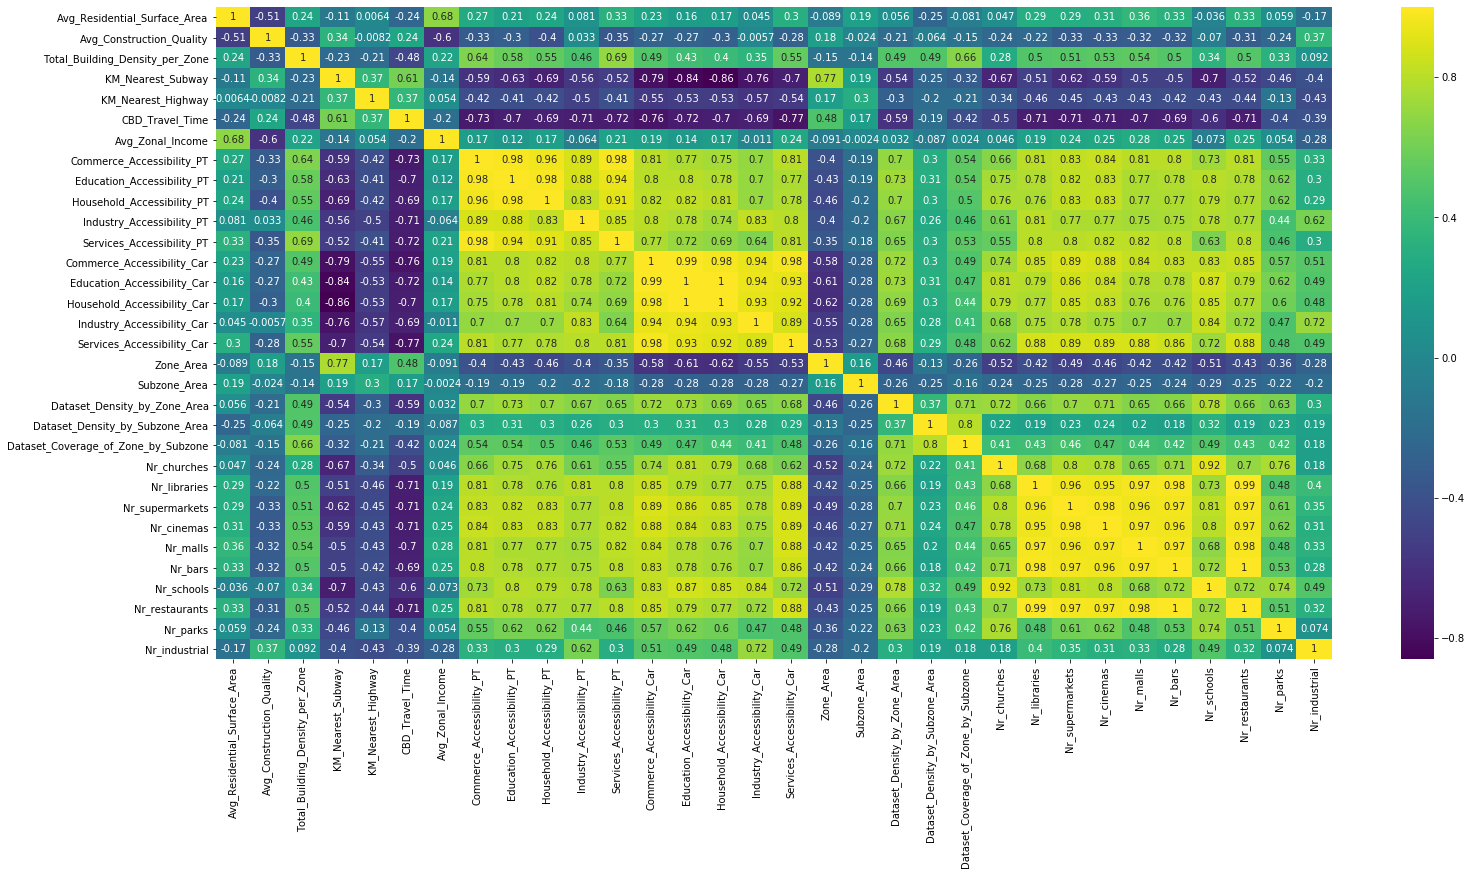

In [13]:
plt.figure(figsize = [25, 12])
sns.heatmap(df.drop(columns = ['Lat', 'Lon', 'Household_Type']).corr(), annot = True, cmap = 'viridis'); # Here we remove the categorical numerical variables, so that they don't come into the correlation analysis

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t); # update the ylim(bottom, top) values

Very sadly, we can see that the number of variables in our model which are collinear (_i.e. one predictor can be predicted from the others_) is very large, as indicated by the large number of vivid green and vivid blue rectangles in the matrix. **Moreover, it appears that our augmented data variables from OpenStreetMaps have unfortunately not brought much to the model, as most of them are correlated, thus we would expect their predictive power to be low when put together.**

For this kind of dataset, we can argue that we are having a high dimensionality which might not however bring lots of predictive power, and it would be much better to reduce the dataset's dimensional size to a more reasonable one, while still preserving most of the variability of the attributes.

__Therefore, we argue that it is highly necessary to use a technique such as Principal Component Analysis (PCA) to reduce the multicollinearity present in this dataset's structure.__ We will choose the minimum preserved variance threshold of 95%, since this is a value which would provide a good balance between removing weak principal components and well-preserving the data's variance.

---

### _Part 8.2: Visual interpretation of predictive power of variables using a Forward Selection test_

___However, when performing PCA upon the dataset, the inner variables of data will become hard to be interpreted, since each Principal Component will be related to all the original numerical variables of the dataset.___

Before we do that and lose the interpretability upon our data, we want to better understand which attributes are very relevant for prediction within our Logistic Regression model, so that we have a better idea which variables contribute highly to our model, in a visual way.

___We mention that, after performing multiple back-stage tests upon the encoding of the categorical variables, we have realized that including the encoded Zone Names into the dataset actually hurts performance, since there are many zones in the training set which cannot geographically be found in the test set, and the models seemed to use those zone encodings to a large extent when performing fitting of the data. For the same reason, latitude and longitude will be dropped after separation of data into training and test set. The other categorical variables will stay, due to their higher likelihood of their values being found consistently, regardless of the chosen set.___ 

We are interested in discovering whether we can improve this model by reaching the same prediction power using fewer attributes. For this purpose, we perform a forward selection test with  cross-validation across five outer folds and 10 inner folds, where we train a model starting with no features and gradually select and add, one-by-one, the features which minimize the classification error in the inner cross-validation loop, up until the error cannot be minimized by adding any further predictors. 

__Let us first define the necessary functions to perform a detailed plotting of the variable selection within our experiment.__ _We will use the `feature_selector_log_reg` function, which is a modified version of a similar function created by prof. Tue Herlau from DTU Compute. We have modified `feature_selector_log_reg` and `reg_model_validate` in order to compute error rate for classification problems (since they were originally purposed for Least-Squares Regression)_.

In [14]:
def feature_selector_log_reg(X, y, cvf = 5, features_record = None, loss_record = None, display = ''):
    ''' Function performs feature selection for logistic regression model using
        'cvf'-fold cross validation. The process starts with empty set of
        features, and in every recurrent step one feature is added to the set
        (the feature that minimized loss function in cross-validation.)

        Parameters:
        X       training data set
        y       vector of values
        cvf     number of crossvalidation folds

        Returns:
        selected_features   indices of optimal set of features
        features_record     boolean matrix where columns correspond to features
                            selected in subsequent steps
        loss_record         vector with cv errors in subsequent steps
        
        Example:
        selected_features, features_record, loss_record = ...
            feature_selector_lr(X_train, y_train, cvf=10)
    ''' 
    
    y = y.squeeze()
    # first iteration error corresponds to no-feature estimator
    if loss_record is None:
        baseline_class = np.argmax([-1, len(y[y == 1]), len(y[y == 2]), len(y[y == 3])]) # -1 is there only because we want to start counting from index 1 :)
        loss_record = np.array([np.sum(y != baseline_class) / len(y)])
    if features_record is None:
        features_record = np.zeros((X.shape[1],1))

    # Add one feature at a time to find the most significant one.
    # Include only features not added before.
    selected_features = features_record[:,-1].nonzero()[0]
    min_loss = loss_record[-1]
    
    if display is 'verbose':
        print(min_loss)
        
    best_feature = False
    for feature in range(0, X.shape[1]):
        if np.where(selected_features == feature)[0].size == 0:
            trial_selected = np.concatenate((selected_features,np.array([feature])),0).astype(int)
            
            # validate selected features with logistic regression and cross-validation:
            trial_loss = reg_model_validate(X[:, trial_selected],y,cvf)
            if display is 'verbose':
                print(trial_loss)
            if trial_loss < min_loss:
                min_loss = trial_loss 
                best_feature = feature

    # If adding extra feature decreased the loss function, update records
    # and go to the next recursive step
    if best_feature is not False:
        features_record = np.concatenate((features_record, np.array([features_record[:,-1]]).T), 1)
        features_record[best_feature,-1] = 1
        loss_record = np.concatenate((loss_record,np.array([min_loss])),0)
        selected_features, features_record, loss_record = feature_selector_log_reg(X,y,cvf,features_record,loss_record)
        
    # Return current records and terminate procedure
    return selected_features, features_record, loss_record


def reg_model_validate(X, y, cvf=10):
    ''' Validate logistic regression model using 'cvf'-fold cross validation.
        The loss function computed as the error rate.

        Parameters:
        X       training data set
        y       vector of values
        cvf     number of crossvalidation folds        
    '''
    y = y.squeeze()
    CV = model_selection.KFold(n_splits = cvf, shuffle=True)
    validation_error=np.empty(cvf)
    f=0
    for train_index, test_index in CV.split(X):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        m = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', n_jobs = -1).fit(X_train, y_train)
        validation_error[f] = np.sum(y_test != m.predict(X_test))/len(y_test)
        f=f+1
    return validation_error.mean()


def bmplot(yt, xt, X):
    ''' Function plots matrix X as image with lines separating fields. '''
    plt.imshow(X,interpolation='none',cmap='bone')
    plt.xticks(range(0,len(xt)), xt)
    plt.yticks(range(0,len(yt)), yt)
    for i in range(0,len(yt)):
        plt.axhline(i-0.5, color='black')
    for i in range(0,len(xt)):
        plt.axvline(i-0.5, color='black')

Now, we will perform a quick modeling of the data to be properly inputted into the logistic regression. _We need to remember that this is not the final processing of the data, since we will need to reduce its dimensionality with PCA later on._

In [7]:
# Drop the zone name, since it hurts model performance (we tested it beforehand)
df.drop(columns = ['Zone_Name'], inplace = True)
train_df.drop(columns = ['Zone_Name'], inplace = True)
test_df.drop(columns = ['Zone_Name'], inplace = True)

# Encode the categorical variables
df = pd.get_dummies(df)
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

In [8]:
# Extract the modeled target variable
y = train_df.Household_Type.as_matrix()
y_final_test = test_df.Household_Type.as_matrix()

# Drop the target from dataframes, so that we can later transform the dataframes into the predictor matrixes
test_df.drop(['Household_Type'], axis = 1, inplace = True)
train_df.drop(['Household_Type'], axis = 1, inplace = True)

X = train_df.as_matrix()
X_final_test = test_df.as_matrix()

__We also need to standardize the data before performing any kind of modeling or PCA reduction, so that the scaling of the different variables will not impact their selection unequally.__

In [9]:
# Here, we will standardize the data, so that the scaling of the different variables will not impact their selection unequally
X = np.nan_to_num(stats.zscore(X))
X_final_test = np.nan_to_num(stats.zscore(X_final_test))

In [15]:
print('Size of the training dataset is: ' + str(X.shape))
print('Size of the test dataset is: ' + str(X_final_test.shape))

Size of the training dataset is: (14876, 48)
Size of the test dataset is: (2921, 48)


Here comes the interesting part: let us perform the actual forward selection of features using Logistic Regression models.

__A black square will represent that the variable has been selected as relevant for an iteration of the cross-validated logistic regression model. At each internal CV (cross-validation) fold, only one variable can be selected. That is why you can see, in the schema below, not only which variables are most important to the model, but also _in what order_ they are selected.__

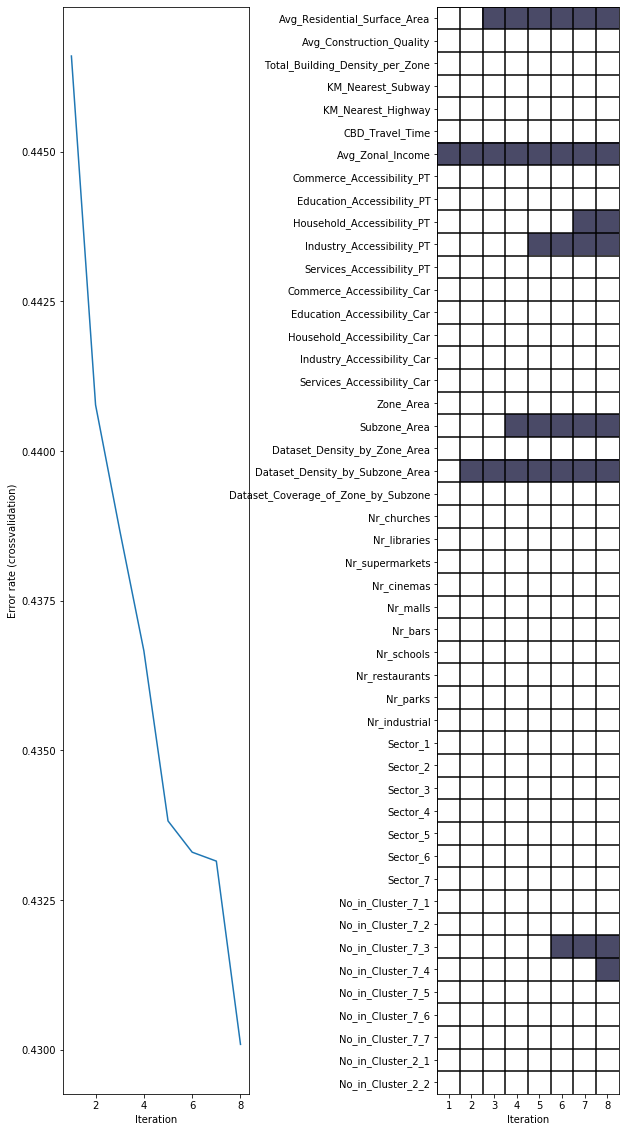

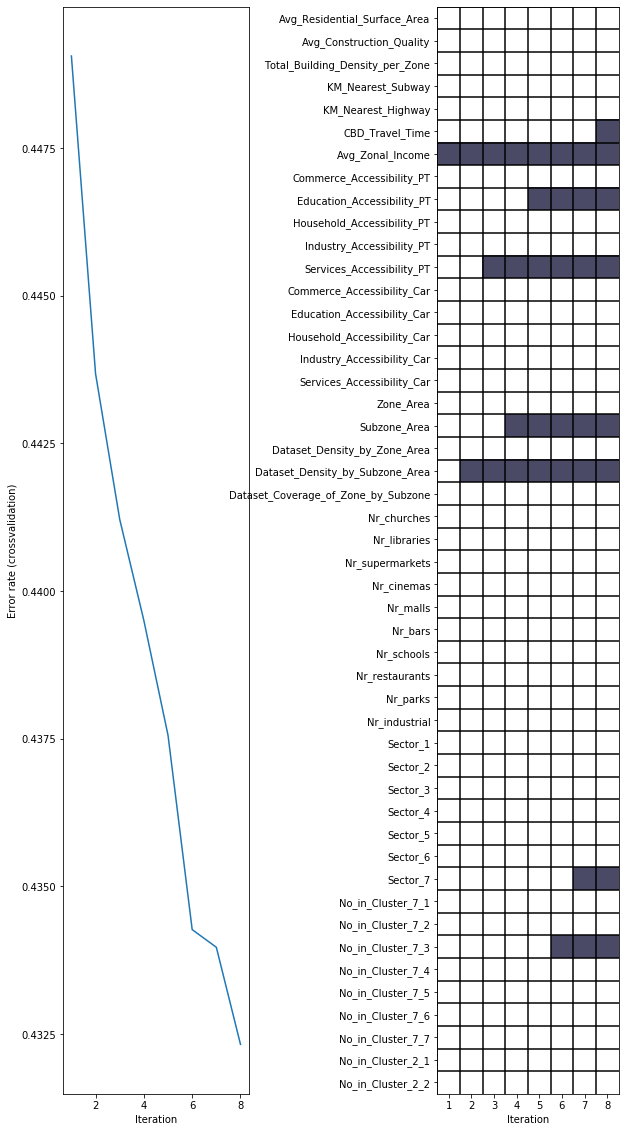

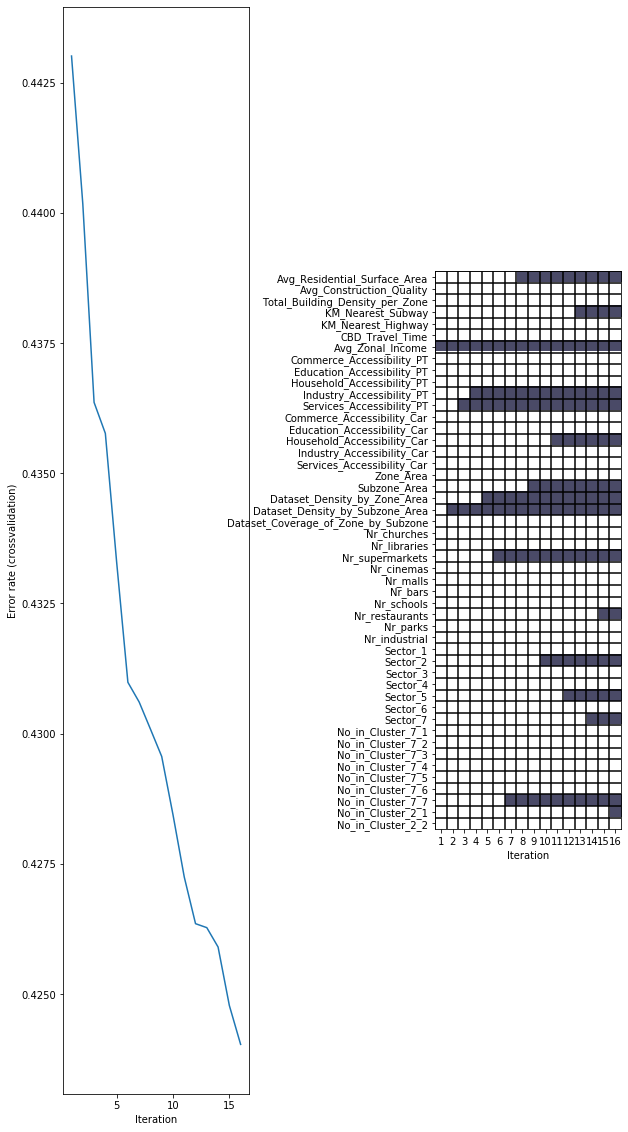

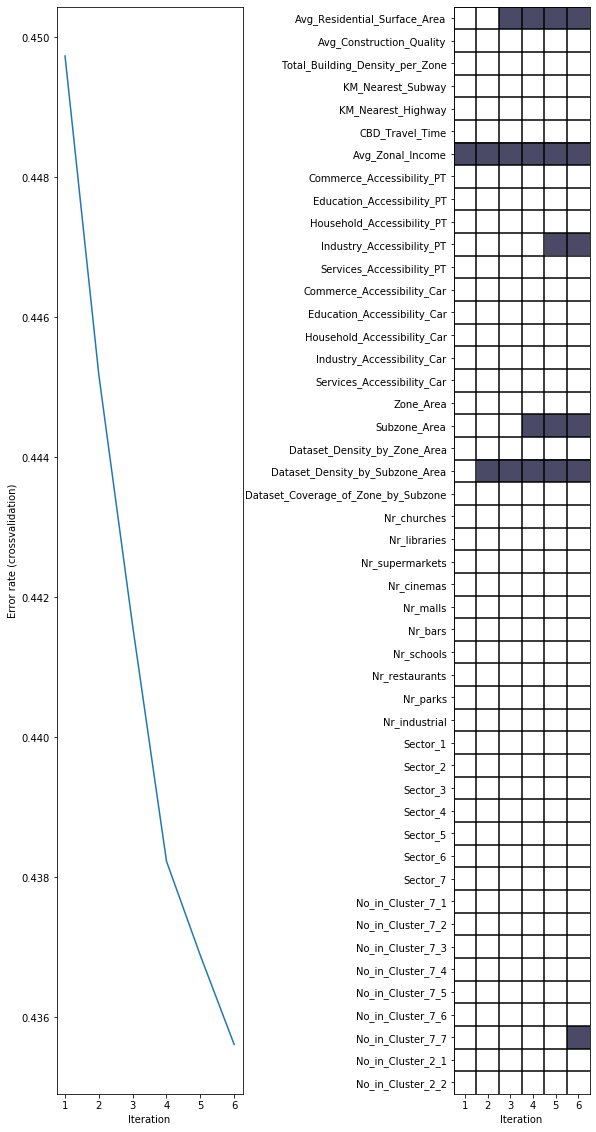

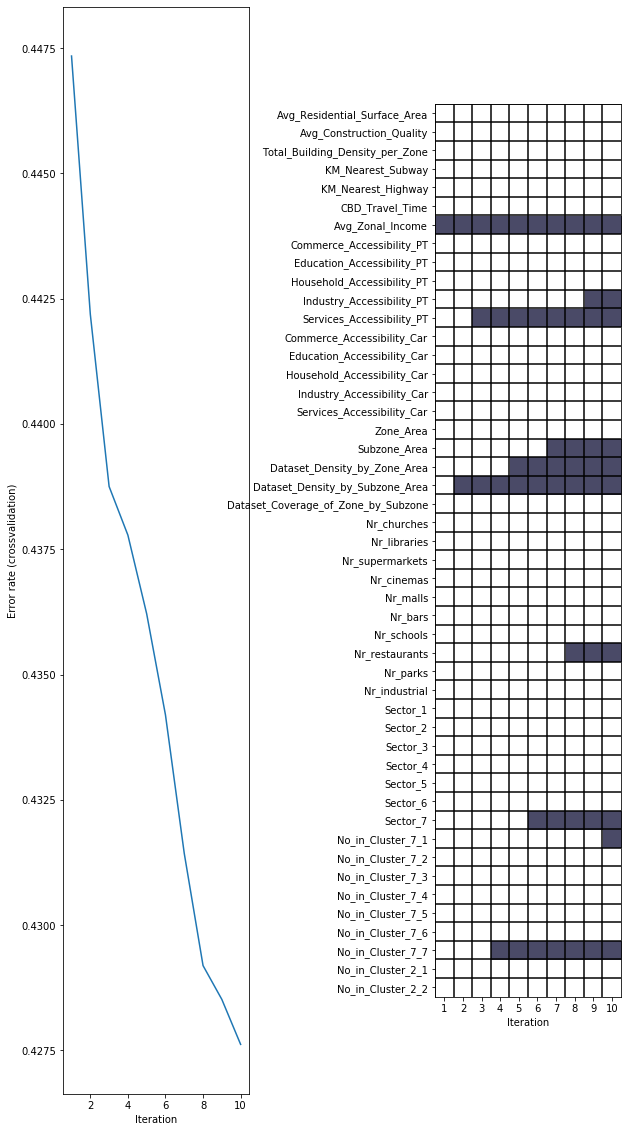

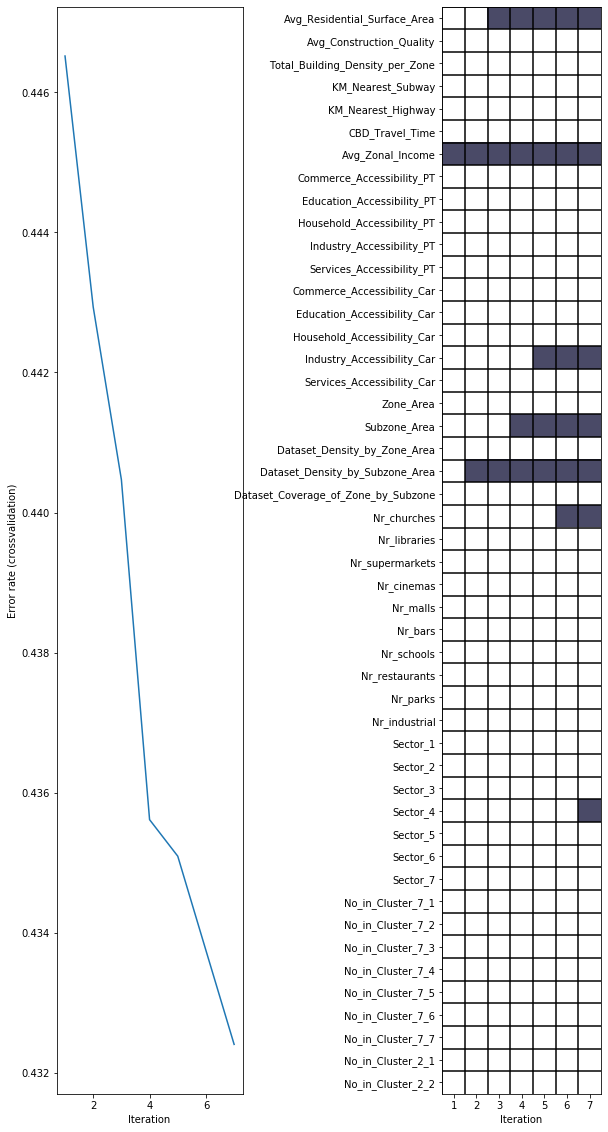

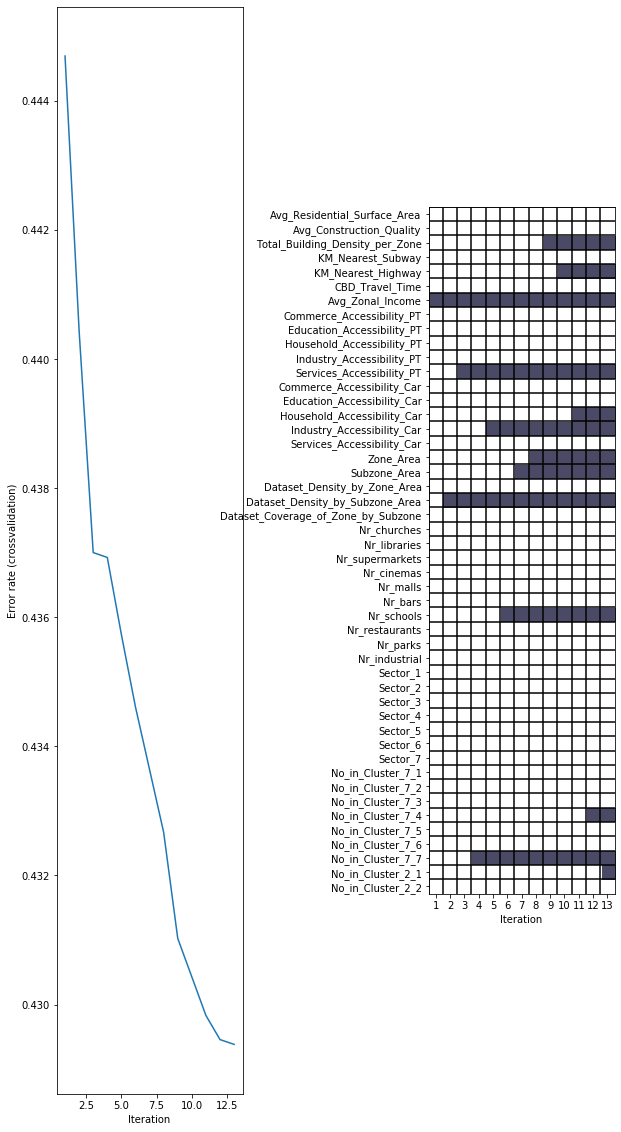

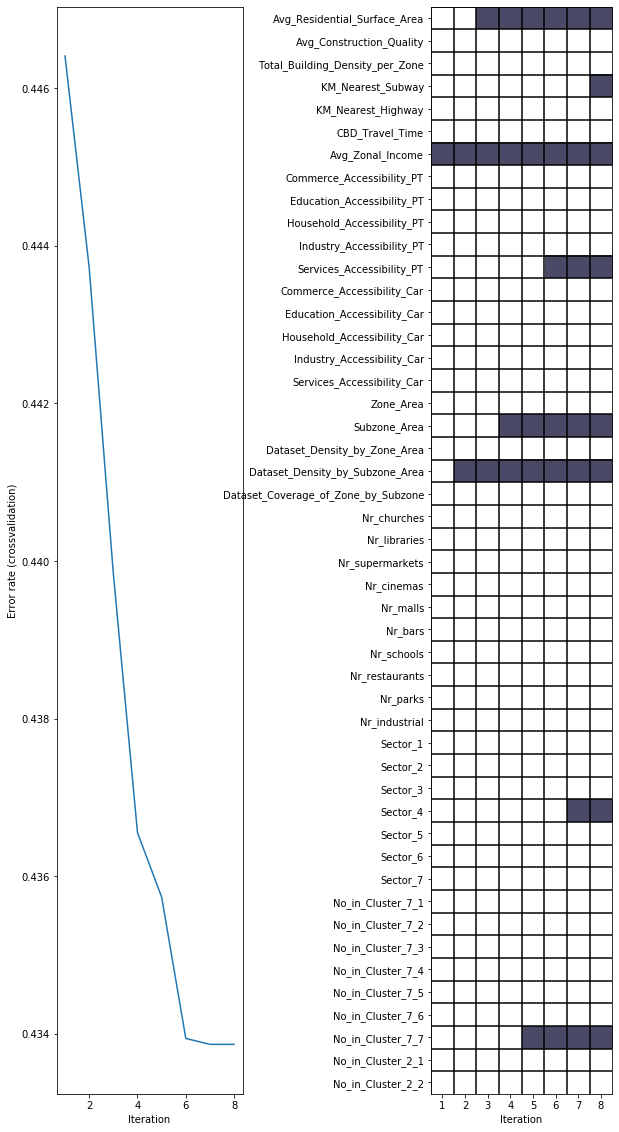

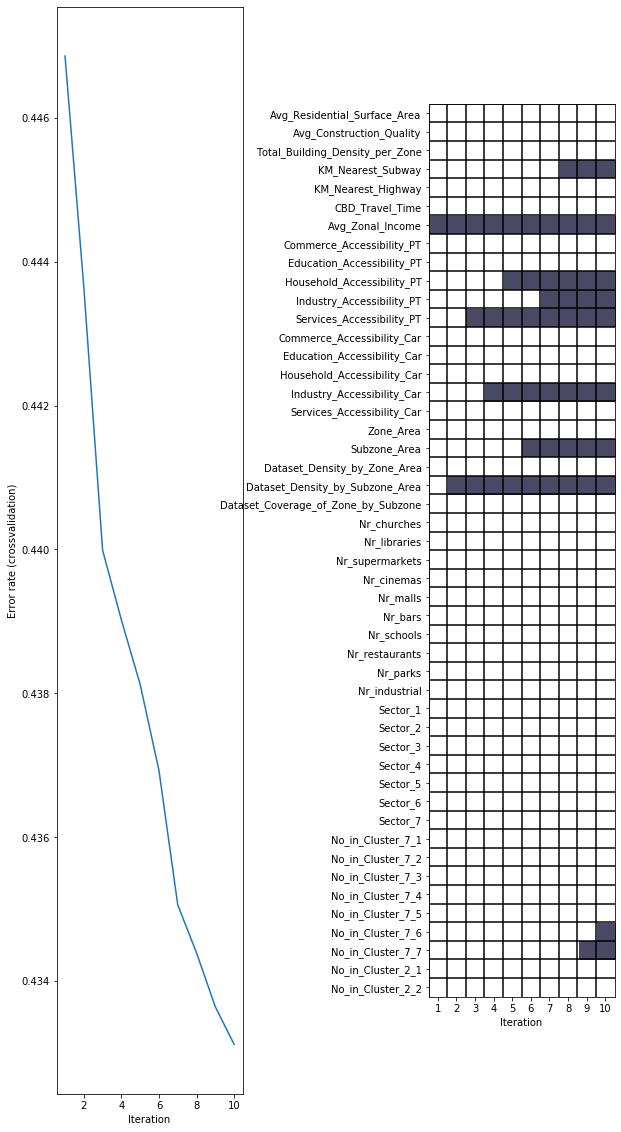

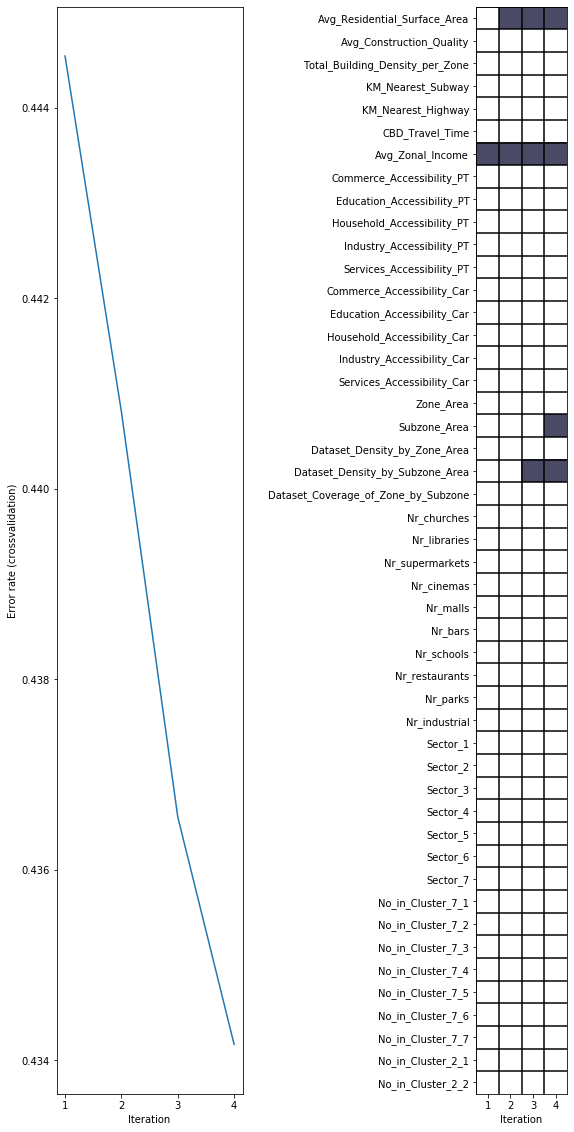

In [20]:
N, M = X.shape # we need the size of the training matrix for vector intializations 
attributeNames = list(train_df.columns) # This will allow us to visually display the names of our dataset variables

# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(n_splits = K, shuffle = True)
internal_cross_validation = 10

# Initialize variables
Features = np.zeros((M, K))
Error_train = np.empty((K, 1))
Error_val = np.empty((K, 1))
Error_train_fs = np.empty((K, 1))
Error_val_fs = np.empty((K, 1))
Error_train_nofeatures = np.empty((K, 1))
Error_val_nofeatures = np.empty((K, 1))

k = 0 # Internal counter for first fold of CV 
for train_index, val_index in CV.split(X):
    
    # extract training and test set for current CV fold
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_val = X[val_index,:]
    y_val = y[val_index]
    
    # Compute error without using the input data at all (i.e. without using any features)
    baseline_class = np.argmax([-1, len(y[y == 1]), len(y[y == 2]), len(y[y == 3])]) # -1 is there only because we want to start counting from index 1 :)

    Error_train_nofeatures[k] = np.sum(y_train != baseline_class) / len(y_train)
    Error_val_nofeatures[k] = np.sum(y_val != baseline_class) / len(y_val)
    
    # Compute error with all features selected (no feature selection)
    m = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', n_jobs = -1).fit(X_train, y_train)
    
    Error_train[k] = np.sum(y_train != m.predict(X_train))/len(y_train)
    Error_val[k] = np.sum(y_val != m.predict(X_val))/len(y_val)

    # Compute error with feature subset selection
    textout = '';
    selected_features, features_record, loss_record = feature_selector_log_reg(X_train, y_train, internal_cross_validation, display = textout)
    Features[selected_features, k] = 1
    # .. alternatively, we could have used module sklearn.feature_selection
    
    if len(selected_features) is 0:
        print('No features were selected, i.e. the data (X) in the fold cannot describe the outcomes (y).')
    else:
        m = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', n_jobs = -1).fit(X_train[:,selected_features], y_train)
        
        Error_train_fs[k] = np.sum(y_train != m.predict(X_train[:,selected_features]))/len(y_train)
        Error_val_fs[k] = np.sum(y_val != m.predict(X_val[:,selected_features]))/len(y_val)
    
        figure(k, figsize = [10, 20])
        plt.subplots_adjust(wspace = 1.0)
        subplot(1, 2, 1)
        plot(range(1, len(loss_record)), loss_record[1:])
        xlabel('Iteration')
        ylabel('Error rate (crossvalidation)')    
        
        subplot(1,2,2)
        bmplot(attributeNames, range(1, features_record.shape[1]), -features_record[:, 1:])
        clim(-1.5, 0)
        xlabel('Iteration')
    k = k + 1

__Let us look, across all the 10 cross-validation folds, at which variables were selected to be representative of most of the variance in the model, _for each individual fold in part_.__

Each column in the below graph corresponds to one of the 10 iterations across the _outer fold_ of the cross-validation. If a variable has many grey boxes, it means that it was selected many times during the feature selection, and is very representative for classification within our dataset. If variables have been selected only once or twice across the whole 2-fold CV selection algorithm, we can assume that they are not bringing much new predictive power to our models.

<Figure size 432x288 with 0 Axes>

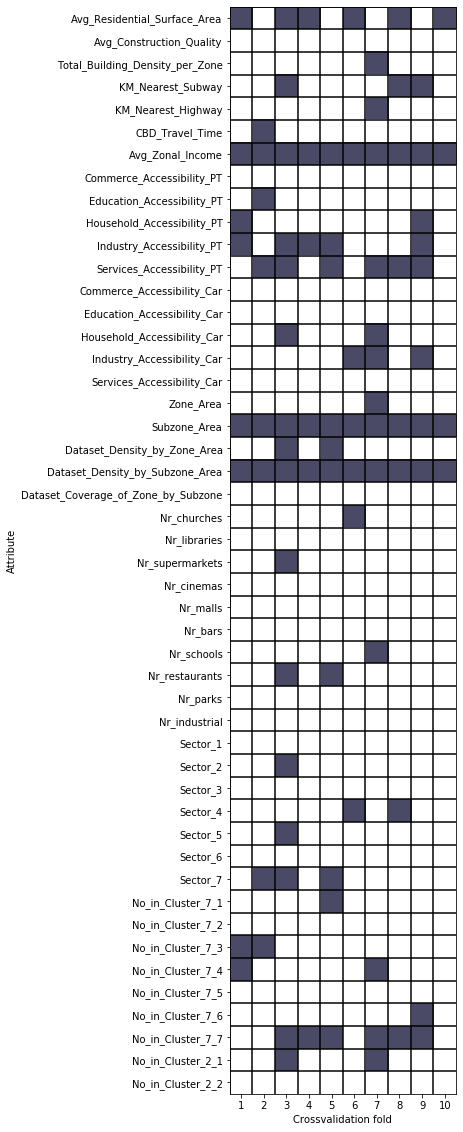

In [21]:
figure();
figure(k, figsize = [5, 20]);
bmplot(attributeNames, range(1,Features.shape[1] + 1), -Features);
clim(-1.5, 0);
xlabel('Crossvalidation fold');
ylabel('Attribute');

From the above results, we have an overall picture of which variables contribute more to explaining the dataset variance. We can see that __the top 3 most important variables for our model are: `Avg_Zonal_Income` and two of our self-engineered variables computed from the .dbf Zone shape files: `Subzone_Area` and `Dataset_Density_by_Subzone_Area`.__ 

Unfortunately, the graph above shows us that there are lots of variables which do not actually contribute significantly enough to lower the training and validation error for our models. _This is likely due to the large multicollinearity present in our dataset._

__One conclusion that we received from this feature selection test is that our categorical variables `No_in_Cluster_2`, `No_in_Cluster_7` and `Sector` are not very relevant during most of the cross-validation folds, even though we can see that they introduce a high dimensionality increase with their addition. Therefore, in order to balance out the dimensionality of our data while preserving relevant features, we have decided to leave them out of our final modeling of the data. Since they are categorical variables, we would also not include them directly in the PCA reduction, but would going the categorical dummy matrix with the PCA-applied numerical matrix at the end of the PCA step. By removing these variables, we are able to remove 16 unnecessary dimensions.__

Finally, we will compute the training and validation error values for both the full model without any feature selection and the newly-fitted feature-selected model, in order to see, when we perform the PCA dimensionality reduction, whether the scoring of the model has improved or not, and also to understand which variables contain most of the variance within the dataset. 

_We must mention that, for this feature selection, we have only used data from the geo-located training set, and have splitting this data further into training and validation sets by using the **cross-validation** technique._

In [22]:
# Display results
print('Logistic regression without feature selection: (when using all features)')
print('- Training error when using all features:       {0}'.format(Error_train.mean()))
print('- Validation error when using all features:     {0}'.format(Error_val.mean()))
print()
print('Logistic regression with feature selection:')
print('- Training error with FS:                       {0}'.format(Error_train_fs.mean()))
print('- Validation error with FS:                     {0}'.format(Error_val_fs.mean()))

Logistic regression without feature selection: (when using all features)
- Training error when using all features:       0.42837832844111273
- Validation error when using all features:     0.43378780976346976

Logistic regression with feature selection:
- Training error with FS:                       0.4311493038747276
- Validation error with FS:                     0.43432521819930436


#### Conclusion:

___Even though we have performed an extensive test within feature selection upon our dataset, we can clearly see from the error scores above that the differences between removing unnecessary features, or keeping all the initial ones in the model, is actually negligbile, and similar high error rates are being found in both situations.___

However, we argue that, since our dataset variables are so strongly correlated together, when we trained logistic regression models upon the non-PCA reduced dataset, most of the variance in the dataset was actually explained by much fewer dimensions than we project. Perhaps only 7 or 8 variables explain just as much as all our ~50 variables do now. 

_That is why we will move on and reduce the dimensionality of our data._

---

### _Part 8.3: Preparation of data for modeling using PCA_

It is a good idea to perform PCA on the whole dataset, and then separate into training and test sets, since, further on, the classifiers will be trained on data in the dimensional space defined by the principle components of the training data. It would not make sense to evaluate them in a new dimensional space corresponding to PCA done only upon the test set. Therefore, we should apply the same PCA transformation to the test data as we are doing to the training data, in order to stay within the exact same dimensional space.

___Since we also have some categorical variables with numerical structure, which will be one-hot-encoded further on, they will be left out of the PCA transformation. We will join the PCA-transformed set of data together with the encoded categorical variables at the end of processing.___

In [10]:
df = pd.read_csv('Households_Data_Processed.csv', index_col = 'Household_ID')
df = df[ML_columns]

In [11]:
#----------------------------------------This is not necessary anymore----------------------------------------#
# Casting these attributes as categories, so that they don't come into the correlation analysis
# df.Household_Type = df.Household_Type.astype('category')

# df.Sector = df.Sector.astype('category')
# df.No_in_Cluster_2 = df.No_in_Cluster_2.astype('category')
# df.No_in_Cluster_7 = df.No_in_Cluster_7.astype('category')
# df.Zone_Name = df.Zone_Name.astype('category')

# # We need to have them as integers to be able to compare them numerically
# temp_df.Lat = temp_df.Lat.astype('float')
# temp_df.Lon = temp_df.Lon.astype('float')

In [12]:
# Resetting the index makes finding the 0...n indexes of the training and test data much easier, as they will have the same locations even in matrix form
temp_df = df.reset_index().drop(columns = ['Household_ID', 'Household_Type', 'Sector', 'No_in_Cluster_2', 'No_in_Cluster_7', 'Zone_Name'])

test_indexes = temp_df[(temp_df.Lat >= -33.5) & (temp_df.Lat <= -33.4) & (temp_df.Lon >= -70.7) & (temp_df.Lon <= -70.6)].index.tolist()
train_indexes = temp_df[temp_df.index.isin(test_indexes) == False].index.tolist()

In [13]:
#----------------------------------------This is not necessary anymore----------------------------------------#
# temp_df = temp_df.select_dtypes(include = ['int64', 'float64']) # We have removed the categorical variables

In [14]:
temp_df.drop(['Lat', 'Lon'], axis = 1, inplace = True)

In [15]:
# We will transform the whole numerical subset of variables into a matrix form 
M = temp_df.as_matrix()

___Before we do PCA, we first need to standardize our data, since PCA tries to maximize the variance explained by each component, therefore it is necessary that no attributes have unfair advantage in being perceived as having larger variance only because of their larger scaling.___

In [16]:
# Now, we will standardize our data accordingly:
M = StandardScaler().fit_transform(M)

In [17]:
M

array([[ 0.09477389,  0.94556824, -0.73928573, ..., -1.38323692,
        -1.23804665, -0.91161535],
       [ 0.40304819,  0.94556824, -0.79742489, ..., -1.39449007,
        -1.23804665, -0.95275432],
       [ 0.39773312,  0.94556824, -0.86227241, ..., -1.42449847,
        -1.23804665, -1.44642201],
       ...,
       [-0.19755519,  0.36886136, -0.25404737, ...,  0.07404598,
        -1.09153942,  1.57729258],
       [-0.6068159 ,  1.00323893, -0.18249149, ...,  0.83550912,
         0.81305466,  0.06543529],
       [-0.95229571,  1.00323893, -0.30100592, ...,  0.8186294 ,
         0.81305466,  0.05515054]])

In [18]:
print('The number of numerical dimensions before PCA is:', M.shape[1])

The number of numerical dimensions before PCA is: 32


We are now ready to do PCA upon the numerical subset of variables. The sklearn library will compute how many components will be needed to preserve 95% of the variance in the data, and we will store that accordingly.

In [19]:
n_comp = PCA(0.95).fit_transform(M).shape[1]     # Gives you 11 components, a major reduction from the previous 32 dimensions
M = PCA(n_components = n_comp).fit_transform(M)

In [20]:
print('The number of numerical dimensions after PCA, while preserving 95% of the variance, is:', M.shape[1])

The number of numerical dimensions after PCA, while preserving 95% of the variance, is: 11


In [21]:
M

array([[ 7.4281674 ,  0.74192673,  0.05985633, ..., -0.02141419,
        -0.59541806, -0.08653887],
       [ 7.38732925,  0.75097355, -0.28689296, ..., -0.11736478,
        -1.29159406,  0.70391419],
       [ 8.81634523,  2.34706802,  0.59024796, ...,  0.47406734,
         1.32909809, -0.6865185 ],
       ...,
       [-1.06727051, -1.31416521, -0.05125852, ..., -0.27907476,
         0.33143243,  0.49166374],
       [-3.99098191, -1.38446923,  1.85006731, ..., -0.58026604,
         0.34134831,  1.67621171],
       [-2.83692232, -1.569636  , -0.50433771, ..., -0.40455446,
        -0.44439843, -0.15202791]])

In [22]:
# Let us now return and join the data transformed here together with some of the categorical data left out in this analysis.

# temp_df = df.reset_index().select_dtypes(include = ['category'])
# temp_df.drop(columns = ['Lat', 'Lon', 'Zone_Name', 'Household_Type'], inplace = True)

# temp_df = pd.get_dummies(temp_df) # Let us now one-hot encode the three categorical variables

# M_categ = temp_df.as_matrix()

# M = np.concatenate((M, M_categ), axis = 1) # Concatenate the matrices together by columns

In [23]:
print('The final shape of the dataset matrix is:', M.shape)

The final shape of the dataset matrix is: (17797, 11)


Finally, let us separate this common data matrix into the training and testing matrices, which will be used as feeding input to the supervised learning models:

In [24]:
X = M[train_indexes]
X_final_test = M[test_indexes]

In [25]:
print('The shape of the training data matrix is:', X.shape)
print('The shape of the test data matrix is:', X_final_test.shape)

The shape of the training data matrix is: (14876, 11)
The shape of the test data matrix is: (2921, 11)


Let us also store the vector for the target variable, retrieving its values very easily through the train_df and test_df separation, just as the one created at the beginning of this notebook. However, since we already have extracted the target variable when performing feature selection, we may simply reuse these vectors.

_Since this is a multiclass problm, we will need to store the target variable in two different forms: one is as a vector for inputting in Logistic Regression (and other sklearn models), and another is as a one-hot encoded categorical matrix, for inputting into the Neural-Network library Keras._

In [26]:
# We only do this here to show that, because of our previous extraction of the target variable for feature selection, we can now use it here
y = y 
y_final_test = y_final_test

y_keras = pd.get_dummies(y).as_matrix()
y_final_test_keras = pd.get_dummies(y_final_test).as_matrix()

---

<a id='logreg'></a>
## Part 9: _<u>Classification using Logistic Regression</u>_

Now, we will once again perform a classification upon our data using the ___Logistic Regression___ algorithm, however this time, the inputted data will not be the full initial data, but the matrix represented by the first 15 Principal Components, which explain ~95% of the data's variance. 

Let us explain the best practices used in modeling this functionality:
* __We have implemented 2-layer Cross-Validation for accurate and stable results of accuracy and F1 scores retrieved from inputting the data into the model.__ More specifically, 2-layer CV allows us to avoid the issues of random minimal error due to lucky selection of the sample in the validation or test sets. We must mention that all the train-test-validation splits performed across the 2-layer CV have been done taking data from the original geo-selected "training" set. Only after fully finishing the hyperparameter selection and model evaluation upon the CV'd data, we will perform a test on the actual geo-selected "test" data for our problem set.

* __We are testing for optimal hyperparameter selection within the inner folds of the Cross-Validation algorithm.__ For logistic regression, the only hyperparameter that we are tuning is the regularization parameter $\lambda$. Since we do not want our models to overfit on the training data, it is reasonable to use a penalty for the weights which allow large fluctuations of the final classification probablity results when their corresponding predictors change only slightly in value. That is why we decided to use the ridge (_L2_) regularization upon the Logistic Regression predictor weights, with the hyperparameter C being $1/\lambda$.

* __We try to find the optimal value for C or $\lambda$, by selecting a possible range for $\lambda$ between $10^{-5}$ and $10^5$__, and testing possible values by incrementing exponentially in powers of 10. After that, we will select the $\lambda$ value which has appeared most times in our final cross-validation outer folds, in order to train the "test" model on the final test data.

* Using our previously-defined __scoring method for accuracy and weighed-average macro F1 computation__, we will get relevant scores for checking the potential of prediction that our models have.

In [132]:
lambda_interval = np.power(10.,range(-5,5))

K1 = 10 # for model selection
K2 = 10 # for optimal parameter selection

# K-fold crossvalidation
CV1 = model_selection.KFold(n_splits = K1, shuffle = True)

# Initialize variable
logreg_test_acc_k1 = np.zeros(K1)
logreg_test_f1_k1 = np.zeros(K1)
optimal_lambda_selection_array = np.zeros(K1)

k1 = 0
for par_index, test_index in CV1.split(X, y):
    # extract training and test set for current CV fold
    X_par, y_par = X[par_index,:], y[par_index]
    X_test, y_test = X[test_index,:], y[test_index]
    
    CV2 = model_selection.KFold(n_splits = K2, shuffle = False)
    
    logreg_gen_acc = np.zeros(len(lambda_interval))
    logreg_gen_f1 = np.zeros(len(lambda_interval))
    
    for s in range(0, len(lambda_interval)):
        k2 = 0
        
        logreg_val_acc = np.zeros(K2)
        logreg_val_f1 = np.zeros(K2)
        
        for train_index, val_index in CV2.split(X_par, y_par):

            # extract training and test set for current CV fold
            X_train, y_train = X_par[train_index,:], y_par[train_index]
            X_val, y_val = X_par[val_index,:], y_par[val_index]
        
            logreg_model = LogisticRegression(penalty = 'l2', C = 1/lambda_interval[s], solver = 'lbfgs', multi_class='multinomial', n_jobs = -1) 
            logreg_model = logreg_model.fit(X_train, y_train)

            logreg_y_val_estimated = logreg_model.predict(X_val).T
            
            logreg_val_acc[k2] = evaluate(y_val, logreg_y_val_estimated, use_weighted_average = True)[0]
            logreg_val_f1[k2] = evaluate(y_val, logreg_y_val_estimated, use_weighted_average = True)[1]
            
            k2 = k2 + 1
        
        logreg_gen_acc[s] = np.sum(logreg_val_acc) / len(logreg_val_acc)
        logreg_gen_f1[s] = np.sum(logreg_val_f1) / len(logreg_val_f1)
       
    # logreg_min_error = np.max(logreg_gen_acc)
    logreg_min_error = np.max(logreg_gen_f1)
    
    #opt_lambda_index = np.argmax(logreg_gen_acc)
    opt_lambda_index = np.argmax(logreg_gen_f1)
    
    opt_lambda = lambda_interval[opt_lambda_index]
    
    # Store the optimal lambda in the array for frequency checking of best lambda later on
    optimal_lambda_selection_array[k1] = opt_lambda
    
    logreg_model = LogisticRegression(penalty = 'l2', C = 1/opt_lambda, solver = 'lbfgs', multi_class = 'multinomial', n_jobs = -1) 
    #logreg_model = LogisticRegression(penalty = 'l1', C = 1/opt_lambda, solver = 'saga', multi_class='multinomial')
    
    logreg_model = logreg_model.fit(X_par, y_par)
    logreg_y_test_estimated = logreg_model.predict(X_test).T
    
    logreg_test_acc_k1[k1] = evaluate(y_test, logreg_y_test_estimated, use_weighted_average = True)[0]
    logreg_test_f1_k1[k1] = evaluate(y_test, logreg_y_test_estimated, use_weighted_average = True)[1]
    
    print('Accuracy - regularized log-reg - CV1 fold {0}/{1}: {2}'.format(k1+1, K1, np.round(logreg_test_acc_k1[k1], decimals = 3)))
    print('F1 Score - regularized log-reg - CV1 fold {0}/{1}: {2}'.format(k1+1, K1, np.round(logreg_test_f1_k1[k1], decimals = 3)))
    print('Optimal lambda: {0}'.format(opt_lambda))
    print()
    k1 += 1

Accuracy - regularized log-reg - CV1 fold 1/10: 0.582
F1 Score - regularized log-reg - CV1 fold 1/10: 0.587
Optimal lambda: 100.0

Accuracy - regularized log-reg - CV1 fold 2/10: 0.552
F1 Score - regularized log-reg - CV1 fold 2/10: 0.558
Optimal lambda: 1.0

Accuracy - regularized log-reg - CV1 fold 3/10: 0.565
F1 Score - regularized log-reg - CV1 fold 3/10: 0.569
Optimal lambda: 100.0

Accuracy - regularized log-reg - CV1 fold 4/10: 0.556
F1 Score - regularized log-reg - CV1 fold 4/10: 0.559
Optimal lambda: 100.0

Accuracy - regularized log-reg - CV1 fold 5/10: 0.564
F1 Score - regularized log-reg - CV1 fold 5/10: 0.569
Optimal lambda: 1.0

Accuracy - regularized log-reg - CV1 fold 6/10: 0.574
F1 Score - regularized log-reg - CV1 fold 6/10: 0.577
Optimal lambda: 100.0

Accuracy - regularized log-reg - CV1 fold 7/10: 0.553
F1 Score - regularized log-reg - CV1 fold 7/10: 0.559
Optimal lambda: 1.0

Accuracy - regularized log-reg - CV1 fold 8/10: 0.549
F1 Score - regularized log-reg - CV

In [168]:
# Select the lambda which occurs most often in the frequency counting array
final_optimal_lambda = pd.Series(optimal_lambda_selection_array).value_counts().index[0]

logreg_model = LogisticRegression(penalty='l2', C = 1 / final_optimal_lambda, solver = 'lbfgs', multi_class='multinomial', n_jobs = -1)
logreg_model = logreg_model.fit(X_final_test, y_final_test)

accuracy, f1_score = evaluate(y_final_test, logreg_model.predict(X_final_test), print_confusion_matrix = True, use_weighted_average = True, print_accuracy = True, print_error_rate = True, print_f1_score = True)

Confusion matrix
- x-axis is true labels 
- y-axis is predicted labels
[[261 414  42]
 [165 824 277]
 [ 18 394 526]]

Accuracy:  0.55152
Error rate:  0.44848
F1 score:  0.55721


In [175]:
print('The trained regularized Logistic Regression model performs {0}% better in accuracy and {1}% in F1-scoring, compared to the primitive baseline model.'.format(np.round((accuracy - baseline_accuracy) * 100, decimals = 2), np.round((f1_score - baseline_f1_weigted_macro_avg) * 100, decimals = 2)))

The trained regularized Logistic Regression model performs 11.55% better in accuracy and 30.22% in F1-scoring, compared to the primitive baseline model.


#### Conclusion:

___As we can see above, even though we have tried to tune the regularization parameter most optimally and take additional measures to avoid overfitting (in which we succeeded), the model is able to perform only very slightly better, in terms of accuracy, compared to the baseline which systematically guesses and predicts only the most common class. However, in terms of F1-score, we argue that there has been a noticeable possitive difference in the precision and recall compared to random guessing, which also would be expected to be the case.___

---

<a id='rndfst'></a>
## Part 10: _<u>Classification using Decision Trees (through Random Forest)</u>_

Next, let us try to compare the performance of Logistic Regression model with another widely-used classification algorithm: Random Forests. This method is basically an ensemble of many Decision Tree models which fit on subsets of the inputted data and on subsets of features considered when splitting nodes. The algorithm will refer to majority voting from the many decision trees in order to decide on the final class of the evaluated entries.

Let us explain the best practices used in modeling this functionality:
* __Once again, overfitting needs to be considered when training the model. Random Forests are very susceptible to overfitting due to their splitting function's nature, which is why we make sure to control such a problem through the parameters of the maximum tree depth, also called _tree pruning_.__ This maximum depth is found using Cross-Validation, resulting in a more stable estimate of the parameter. Each Random Forest tree has been selected to have 100 estimators (decision trees) which will perform these computations.

* __We are using again the 2-layer Cross Validation method in order to estimate the generalization error of the model across multiple angles of our data__.

* Through the usage of our previously-defined __scoring method for accuracy and weighed-average macro F1 computation__, we will get relevant scores for checking the potential of prediction that our models have.

* It should be mentioned that Decision Trees (and implicitly this algorithm as well) are innately adapt at multi-class predictions of target variables from a dataset, since the method (_of splitting entries into separate nodes until they can safely predict the class within a node_) is inherently adapted for any number of possible classes within our data. We have tried (in our "backstage" analysis) to optimize hyperparameters relating to the minimum number of samples required to split an internal node (min_samples_split), the minimum number of samples required to be at a leaf node (min_samples_leaf) and the splitting criterion. From this, we concluded that the information gain measure gives us slightly more reliable results, while min_samples_split and min_samples_leaf can safely be used with their default values, as tuning these parameters has not made a sensible difference in our results.

In [27]:
randfst_tree_max_depth_interval = np.arange(20, 35, 1) # The maximum depth of the random forest individual tree models should be selected to be between 20 and 35

K1 = 10 # for model selection
K2 = 10 # for optimal parameter selection

# K-fold crossvalidation
CV1 = model_selection.KFold(n_splits = K1, shuffle = True)

# Initialize variable
randfst_test_acc_k1 = np.zeros(K1)
randfst_test_f1_k1 = np.zeros(K1)
optimal_max_tree_depth_selection_array = np.zeros(K1)

k1 = 0
for par_index, test_index in CV1.split(X, y):
    # extract training and test set for current CV fold
    X_par, y_par = X[par_index,:], y[par_index]
    X_test, y_test = X[test_index,:], y[test_index]
    
    CV2 = model_selection.KFold(n_splits = K2, shuffle = False)
    
    randfst_gen_acc = np.zeros(len(randfst_tree_max_depth_interval))
    randfst_gen_f1 = np.zeros(len(randfst_tree_max_depth_interval))
    
    for s in range(0, len(randfst_tree_max_depth_interval)):
            k2 = 0

            randfst_val_acc = np.zeros(K2)
            randfst_val_f1 = np.zeros(K2)

            for train_index, val_index in CV2.split(X_par, y_par):

                # extract training and test set for current CV fold
                X_train, y_train = X_par[train_index,:], y_par[train_index]
                X_val, y_val = X_par[val_index,:], y_par[val_index]

                randfst_model = RandomForestClassifier(criterion='entropy', max_depth = randfst_tree_max_depth_interval[s], min_samples_split = 2, min_samples_leaf = 3, n_estimators = 100, n_jobs = -1)
                randfst_model = randfst_model.fit(X_train, y_train)

                randfst_y_val_estimated = randfst_model.predict(X_val).T

                randfst_val_acc[k2] = evaluate(y_val, randfst_y_val_estimated, use_weighted_average = True)[0]
                randfst_val_f1[k2] = evaluate(y_val, randfst_y_val_estimated, use_weighted_average = True)[1]

                k2 = k2 + 1

            randfst_gen_acc[s] = np.sum(randfst_val_acc) / len(randfst_val_acc)
            randfst_gen_f1[s] = np.sum(randfst_val_f1) / len(randfst_val_f1)
       
    # randfst_min_error = np.max(randfst_gen_acc)
    randfst_min_error = np.max(randfst_gen_f1)
    
    # opt_max_tree_depth_index = np.argmax(randfst_gen_acc)
    opt_max_tree_depth_index = np.argmax(randfst_gen_f1)
    
    opt_max_tree_depth = randfst_tree_max_depth_interval[opt_max_tree_depth_index]
    
    # Store the optimal max tree depth for frequency checking of best tree depth later on
    optimal_max_tree_depth_selection_array[k1] = opt_max_tree_depth
    
    randfst_model = RandomForestClassifier(criterion='entropy', max_depth = opt_max_tree_depth, min_samples_split = 2, min_samples_leaf = 3, n_estimators = 100, n_jobs = -1)
   
    randfst_model = randfst_model.fit(X_par, y_par)
    randfst_y_test_estimated = randfst_model.predict(X_test).T
    
    randfst_test_acc_k1[k1] = evaluate(y_test, randfst_y_test_estimated, use_weighted_average = True)[0]
    randfst_test_f1_k1[k1] = evaluate(y_test, randfst_y_test_estimated, use_weighted_average = True)[1]
    
    print('Accuracy - regularized Random Forest - CV1 fold {0}/{1}: {2}'.format(k1+1, K1, np.round(randfst_test_acc_k1[k1], decimals = 3)))
    print('F1 Score - regularized Random Forest - CV1 fold {0}/{1}: {2}'.format(k1+1, K1, np.round(randfst_test_f1_k1[k1], decimals = 3)))
    print('Optimal maximum tree depth: {0}'.format(opt_max_tree_depth))
    print()
    k1 += 1

Accuracy - regularized Random Forest - CV1 fold 1/10: 0.558
F1 Score - regularized Random Forest - CV1 fold 1/10: 0.558
Optimal maximum tree depth: 34

Accuracy - regularized Random Forest - CV1 fold 2/10: 0.536
F1 Score - regularized Random Forest - CV1 fold 2/10: 0.539
Optimal maximum tree depth: 20

Accuracy - regularized Random Forest - CV1 fold 3/10: 0.542
F1 Score - regularized Random Forest - CV1 fold 3/10: 0.547
Optimal maximum tree depth: 28

Accuracy - regularized Random Forest - CV1 fold 4/10: 0.559
F1 Score - regularized Random Forest - CV1 fold 4/10: 0.562
Optimal maximum tree depth: 29

Accuracy - regularized Random Forest - CV1 fold 5/10: 0.556
F1 Score - regularized Random Forest - CV1 fold 5/10: 0.557
Optimal maximum tree depth: 25

Accuracy - regularized Random Forest - CV1 fold 6/10: 0.527
F1 Score - regularized Random Forest - CV1 fold 6/10: 0.529
Optimal maximum tree depth: 33

Accuracy - regularized Random Forest - CV1 fold 7/10: 0.545
F1 Score - regularized Rando

In [228]:
# Select the max tree depth which occurs most often in the frequency counting array
final_optimal_max_tree_depth = pd.Series(optimal_max_tree_depth_selection_array).value_counts().index[0]

randfst_model = RandomForestClassifier(criterion='entropy', max_depth = final_optimal_max_tree_depth, min_samples_split = 2, min_samples_leaf = 3, n_estimators = 100, n_jobs = -1)
randfst_model = randfst_model.fit(X, y)

accuracy, f1_score = evaluate(y_final_test, randfst_model.predict(X_final_test), print_confusion_matrix = True, use_weighted_average = True, print_accuracy = True, print_error_rate = True, print_f1_score = True)

Confusion matrix
- x-axis is true labels 
- y-axis is predicted labels
[[227 425  65]
 [289 700 277]
 [135 317 486]]

Accuracy:  0.48374
Error rate:  0.51626
F1 score:  0.4841


In [229]:
print('The trained Random Forest model performs {0}% better in accuracy and {1}% in F1-scoring, compared to the primitive baseline model.'.format(np.round((accuracy - baseline_accuracy) * 100, decimals = 2), np.round((f1_score - baseline_f1_weigted_macro_avg) * 100, decimals = 2)))

The trained Random Forest model performs 4.77% better in accuracy and 22.91% in F1-scoring, compared to the primitive baseline model.


#### Conclusion:

___From the results above, it appears that the Random Forest model has managed to perform slightly better than the baseline average when considering the F1-scoring, while only bringing a minimal improvement to the overall accuracy of the predictions. Interestingly, the performance presented here is lower than that of our logistic regression, even though both algorithms were tuned to an optimal state of selection, balancing approximation and flexibility.___

---

<a id='nn'></a>
## Part 11: _<u>Classification using Neural Networks</u>_

Lastly, we will try to perform better classification of our target variable and get better multiclass evaluation scores through the use of Deep Learning, more specifically through applying ___Neural Networks___ to the problem at hand. ___The major challenge in designing proper Neural Network models lies not only in the tuning of the hyper-parameters, but perhaps even more importantly,  in the architectural design of its hidden layers.___ We need to carefully select the number of nodes and number of hidden layers that will give us optimal prediction results for our model. We will use the help of the popular Deep Learning library __Keras__ to help us with that.

Let us explain the best practices used in modeling this functionality:
* __Once again, we are using 2-layer Cross-Validation for optimal selection of parameters and accuracy of generalization error computation.__ This time, within the outer fold, there will be multiple consequent inner CV folds, one for each parameter that we are trying to optimally select. __We will find out, in this way, the best number of nodes and layers necessary to build up our NN architecture, as well as the optimal percentage of nodes that should be 'dropped' in a Dropout neural layer.__

* __The Keras NN model has been selected to use a loss function for `categorical_crossentropy` with a `softmax` final layer activation function.__ This is because our problem is a multi-classification one, which requires these functions to give out the best estimate of prediction of the target variable. The number of epochs for each trained Neural Network has been set to 500, which means that we go over the training data again and again 500 times using Gradient Descent, trying to find a point of minima for our loss functions. The training will be done in batches of 2048 elements.

* __The network will be preventing overfitting by using Dropout neural layers, which deactivate a random percentage of neurons by setting their weights to zero.__ We should normally select a Dropout rate of 0.2-0.5 in order to let the regularization have an effect upon on the network without under-learning its features.

* __Since the Keras fitting model has an additional parameter which allows you to set your validation data directly when you train your model upon the training data, we will use the 2-layer CV in a slightly different way than before.__ More specifically, in the previous two algorithms, we have used the inner CV layers to find optimal parameter values using a validation set (taken from the training set) and the outer CV layers to compute an reliable generalization error upon the test data (again, taken from the training set). Now, since Keras allows us to provide both training and validation data in "one go", we will do so, and the purpose of the inner-CV layers will be to find the optimal parameters which give the _maximal categorical accuracy_ upon the test data (taken from the training set) directly. Consequently, the purpose of the outer CV layers is now to find, step-by-step, the most optimal architecture and hyperparameters of the NN and, finally, to compute the accuracy of this optimal NN model upon our geo-separated final test data. This is now done directly within the outer layer CV fold, whereas in the previous two models, we have done it after the crossvalidation function has exited.

In [36]:
# In order to train a Neural Network using Keras, the target variable should not be a vector, but a categorical encoding matrix of the classes of the target variable
y = y_keras
y_final_test = y_final_test_keras

In [42]:
node_interval = [1, 5, 10, 20, 30, 40, 50, 100, 200]
layer_interval = [1, 2, 3, 4, 5]
dropout_percentage_interval = [0.2, 0.25, 0.35, 0.45, 0.5]

num_epochs = 500
batch_size = 2048

K1 = 5 # for generalization accuracy computation
K2 = 5 # for optimal parameter selection

CV1 = model_selection.KFold(n_splits = K1, shuffle = True)
CV2 = model_selection.KFold(n_splits = K2, shuffle = False)

NN_gen_acc = np.zeros(K1)
optimal_n_node_selection_array = np.zeros(K1)
optimal_n_layer_selection_selection_array = np.zeros(K1)
optimal_dropout_selection_array = np.zeros(K1)

k1 = 0
for par_index, test_index in CV1.split(X, y):
    print('Computing CV1 indexing fold: {0}/{1}'.format(k1 + 1, K1))

    X_par, y_par = X[par_index,:], y[par_index, :]
    X_test, y_test = X[test_index,:], y[test_index, :]
    
    NN_node_acc = np.zeros(len(node_interval))
    
    for node_i in range(len(node_interval)):
        NN_node_val_acc = np.zeros(K2)
        k2 = 0
        
        for train_index, val_index in CV2.split(X_par, y_par):
            X_train, y_train = X_par[train_index,:], y_par[train_index, :]
            X_val, y_val = X_par[val_index,:], y_par[val_index, :]
        
            model = Sequential()
            model.add(Dense(units = node_interval[node_i], input_dim = X_train.shape[1], activation = 'relu'))
            model.add(Dense(units = y_train.shape[1], activation = 'softmax'))

            model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])
            history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = num_epochs, batch_size = batch_size, verbose = 0)

            NN_node_val_acc[k2] = history.model.evaluate(X_test, y_test, verbose = 0)[1]
            print('NN node Validation Accuracy, fold {0} with node number {1}, {2}%'.format(k2 + 1, node_interval[node_i], np.round(100 * NN_node_val_acc[k2], decimals = 2)))
            k2 = k2 + 1
            
        NN_node_acc[node_i] = np.sum(NN_node_val_acc) / len(NN_node_val_acc)
    
    best_node_nr = node_interval[np.argmax(NN_node_acc)]
    optimal_n_node_selection_array[k1] = best_node_nr
    print()
    
    
    NN_layer_acc = np.zeros(len(layer_interval))
    
    for layer_j in range(len(layer_interval)):
        NN_layer_val_acc = np.zeros(K2)
        k2 = 0
        
        for train_index, val_index in CV2.split(X_par, y_par):
            X_train, y_train = X_par[train_index,:], y_par[train_index, :]
            X_val, y_val = X_par[val_index,:], y_par[val_index, :]
        
            model = Sequential()
            model.add(Dense(units = best_node_nr, input_dim = X_train.shape[1], activation = 'relu'))
            for j in range(1, layer_interval[layer_j]):
                model.add(Dense(units = best_node_nr, activation = 'relu'))
            model.add(Dense(units = y_train.shape[1], activation = 'softmax'))

            model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])
            history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = num_epochs, batch_size = batch_size, verbose = 0)

            NN_layer_val_acc[k2] = history.model.evaluate(X_test, y_test, verbose = 0)[1]
            print('NN layer Validation Accuracy, fold {0} with node number {1}, layer number {2}, {3}%'.format(k2 + 1, best_node_nr, layer_interval[layer_j], np.round(100 * NN_layer_val_acc[k2], decimals = 2)))
            k2 = k2 + 1
            
        NN_layer_acc[layer_j] = np.sum(NN_layer_val_acc) / len(NN_layer_val_acc)
    
    best_layer_nr = layer_interval[np.argmax(NN_layer_acc)]
    optimal_n_layer_selection_selection_array[k1] = best_layer_nr
    print()
    
    
    NN_dropout_acc = np.zeros(len(dropout_percentage_interval))
    
    for dropout_perc_l in range(len(dropout_percentage_interval)):
        NN_dropout_val_acc = np.zeros(K2)
        k2 = 0
        
        for train_index, val_index in CV2.split(X_par, y_par):
            X_train, y_train = X_par[train_index,:], y_par[train_index, :]
            X_val, y_val = X_par[val_index,:], y_par[val_index, :]
        
            model = Sequential()
            
            model.add(Dense(units = best_node_nr, input_dim = X_train.shape[1], activation = 'relu'))
            model.add(Dropout(rate = dropout_percentage_interval[dropout_perc_l]))
            
            for j in range(1, best_layer_nr):
                model.add(Dense(units = best_node_nr, activation = 'relu'))
                model.add(Dropout(rate = dropout_percentage_interval[dropout_perc_l]))
            
            model.add(Dense(units = y_train.shape[1], activation = 'softmax'))

            model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])
            history = model.fit(X_train, y_train, validation_data = (X_val, y_val), epochs = num_epochs, batch_size = batch_size, verbose = 0)

            NN_dropout_val_acc[k2] = history.model.evaluate(X_test, y_test, verbose = 0)[1]
            print('NN dropout Validation Accuracy, fold {0} with node number {1}, layer number {2}, dropout rate {3}, {4}%'.format(k2 + 1, best_node_nr, best_layer_nr, dropout_percentage_interval[dropout_perc_l], np.round(100 * NN_dropout_val_acc[k2], decimals = 2)))
            k2 = k2 + 1
            
        NN_dropout_acc[dropout_perc_l] = np.sum(NN_dropout_val_acc) / len(NN_dropout_val_acc)
    
    best_dropout_percentage_nr = dropout_percentage_interval[np.argmax(NN_dropout_acc)]
    optimal_dropout_selection_array[k1] = best_dropout_percentage_nr
    print()
    
    
    model = Sequential()
    model.add(Dense(units = best_node_nr, input_dim = X_par.shape[1], activation = 'relu'))
    model.add(Dropout(rate = best_dropout_percentage_nr))
    for j in range(1, best_layer_nr):
        model.add(Dense(units = best_node_nr, activation = 'relu'))
        model.add(Dropout(rate = best_dropout_percentage_nr))
    model.add(Dense(units = y_par.shape[1], activation = 'softmax'))
    
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])
    history = model.fit(X_par, y_par, validation_data = (X_test, y_test), epochs = num_epochs, batch_size = batch_size, verbose = 0)

    NN_gen_acc[k1] = history.model.evaluate(X_final_test, y_final_test, verbose = 0)[1]
    print()
    print('NN generalization accuracy on the final test set, with node number {0}, layer number {1}, dropout rate {2}, {3}%'.format(best_node_nr, best_layer_nr, best_dropout_percentage_nr, np.round(100 * NN_gen_acc[k1], decimals = 2)))
    print()
    print()
    print()
    k1 = k1 + 1

Computing CV1 indexing fold: 1/5
NN node Validation Accuracy, fold 1 with node number 1, 43.75%
NN node Validation Accuracy, fold 2 with node number 1, 55.31%
NN node Validation Accuracy, fold 3 with node number 1, 49.8%
NN node Validation Accuracy, fold 4 with node number 1, 55.04%
NN node Validation Accuracy, fold 5 with node number 1, 54.47%
NN node Validation Accuracy, fold 1 with node number 5, 56.38%
NN node Validation Accuracy, fold 2 with node number 5, 56.38%
NN node Validation Accuracy, fold 3 with node number 5, 56.82%
NN node Validation Accuracy, fold 4 with node number 5, 56.75%
NN node Validation Accuracy, fold 5 with node number 5, 55.75%
NN node Validation Accuracy, fold 1 with node number 10, 57.43%
NN node Validation Accuracy, fold 2 with node number 10, 56.85%
NN node Validation Accuracy, fold 3 with node number 10, 55.75%
NN node Validation Accuracy, fold 4 with node number 10, 56.25%
NN node Validation Accuracy, fold 5 with node number 10, 55.41%
NN node Validation

In [47]:
# Select the optimal parameters from the CV information retrieved above
final_optimal_n_nodes = int(pd.Series(optimal_n_node_selection_array).value_counts().index[0])
final_optimal_n_layers = int(pd.Series(optimal_n_layer_selection_selection_array).value_counts().index[0])
final_optimal_dropout = pd.Series(optimal_dropout_selection_array).value_counts().index[0]

model = Sequential()
model.add(Dense(units = final_optimal_n_nodes, input_dim = X.shape[1], activation = 'relu'))
model.add(Dropout(rate = final_optimal_dropout))
for j in range(1, final_optimal_n_layers):
    model.add(Dense(units = final_optimal_n_nodes, activation = 'relu'))
    model.add(Dropout(rate = final_optimal_dropout))
model.add(Dense(units = y.shape[1], activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['categorical_accuracy'])
history = model.fit(X, y, epochs = num_epochs, batch_size = batch_size, verbose = 0)

In [77]:
# This function converts the predicted probabilities for the target variable of X_final_test_keras, 
# from a matrix with 3 columns representing the individual probabilities of an entry being that class, 
# into a 1-dimensional vector (exactly the y_pred that we need for our 'evaluate' function) representing the predicted class from the NN model

y_pred = np.apply_along_axis(lambda row: np.argmax(row) + 1, axis = 1, arr = model.predict(X_final_test))
print(y_pred)

y_final_test = np.apply_along_axis(lambda row: np.argmax(row) + 1, axis = 1, arr = y_final_test)
print(y_final_test)

[2 2 2 ... 1 1 1]
[2 2 2 ... 1 2 2]


In [78]:
accuracy, f1_score = evaluate(y_final_test, y_pred, print_confusion_matrix = True, use_weighted_average = True, print_accuracy = True, print_error_rate = True, print_f1_score = True)

Confusion matrix
- x-axis is true labels 
- y-axis is predicted labels
[[263 422  32]
 [440 619 207]
 [262 255 421]]

Accuracy:  0.44608
Error rate:  0.55392
F1 score:  0.46184


In [79]:
print('The trained Neural Network model performs {0}% better in accuracy and {1}% in F1-scoring, compared to the primitive baseline model.'.format(np.round((accuracy - baseline_accuracy) * 100, decimals = 2), np.round((f1_score - baseline_f1_weigted_macro_avg) * 100, decimals = 2)))

The trained Neural Network model performs 1.01% better in accuracy and 20.68% in F1-scoring, compared to the primitive baseline model.


#### Conclusion:


___Based on the results above, it appears that, even though we have tried to tune our Neural Network architecture most optimally and avoid over-fitting through proper use of Dropout layers, the NN model performed the worst of the three in terms of accuracy, managing minimal improvements in accuracy compared to the baseline. The F1-score is increased, compared to the baseline, however it has the lowest improvement out of all the three models.___

---

<a id='ending'></a>
## Part 12: _<u>Conclusion</u>_

___As a conclusion to our ML Predictive Analytics notebook, we have modeled, inputted, predicted and classified the data using supervised machine learning algorithm through the proper implementation and selection of relevant parameters for a multiclass classification problem.___

__In regards to the predictive performance of our models presented in this notebook, we have the following final results:__

__I. Baseline model__, computed from always predicting using the most frequent class within the dataset:
* Accuracy: _43.6%_ (baseline)
* F1-score: _25.5%_ (baseline)

__II. Logistic Regression model__, regularized (RIDGE) and optimized:
* Accuracy: _55.1%_ (<font color="green">+11.55%</font>) 
* F1-score: _55.7%_ (<font color="green">+30.22%</font>) 

__III. Random Forest model__, pruned and optimized:
* Accuracy: _48.3%_ (<font color="orange">+4.77%</font>)
* F1-score: _48.4%_ (<font color="orange">+22.91%</font>)

__IV. Neural Network model__, using Sequential architecture, built upon Keras and using Tensorflow backend, regularized and optimized:
* Accuracy: _44.6%_ (<font color="red">+1.01%</font>)
* F1-score: _46.1%_ (<font color="red">+20.68%</font>)

Compared to the baseline model, all of the trained supervised learning algorithms bring an improvement to the prediction of household buyer types within the Santiago market, which can be seen through both scoring and accuracy increases for all the three models. However, the improvements are rather small compared to the minimal value, especially when looking at accuracy levels across all three of the dataset classes. 

In terms of model results comparison, regularized Logistic Regression model is clearly the winner here, which is the only model managing to bring into play a double-digit increase in both accuracy and F1 score. The Neural Network results are particularly surprising, being in the bottom of our leaderboard. Interestingly, by looking at the above results, we can see that that the network performed better in terms of categorical accuracy when trained on only a subset of the model (which we had by doing CV), giving accuracy upon the final test set of about +5% higher than the ending one.

These results show and confirm that the geo-spatial problem at hand is of deep complexity, and cannot be solved easily without harvesting more data and especially more relevant attributes which can account for the class separation while being uniformly distributed both across the training set (outskirts of Santiago) and testing set (in its central zone).

---